In [1]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
# Loading the vendors data
vendors=pd.read_excel('ME2N V5 new.xlsx')

In [4]:
vendors['Name of Supplier'].value_counts().head(10)

Name of Supplier
1053 Raw and Packs                     22294
10003777   TAKMEEL INDUSTRY HOLDING     7898
1301 Riyadh Regional HUb                2680
1337 Aziziya Regional DC                2538
1320 Dammam Regional Hub                2468
1302 Qassim Regional Hub                2444
1315 Jeddah Regional Hub                2275
1313 Hail Distribution Center           1687
1323 Abha Regional Hub                  1683
5001 Bahrain Distribution Center        1643
Name: count, dtype: int64

In [5]:
vendors[vendors['Name of Supplier']=='1053 Raw and Packs']['Short Text'].nunique() # 1053 Raw and Packs 515 materials

515

In [6]:
vendors['Name of Supplier'].value_counts().head(10)

Name of Supplier
1053 Raw and Packs                     22294
10003777   TAKMEEL INDUSTRY HOLDING     7898
1301 Riyadh Regional HUb                2680
1337 Aziziya Regional DC                2538
1320 Dammam Regional Hub                2468
1302 Qassim Regional Hub                2444
1315 Jeddah Regional Hub                2275
1313 Hail Distribution Center           1687
1323 Abha Regional Hub                  1683
5001 Bahrain Distribution Center        1643
Name: count, dtype: int64

In [7]:
# Checking the basic information of the data
vendors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87518 entries, 0 to 87517
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Purchasing info rec.              17139 non-null  float64       
 1   Name of Supplier                  85757 non-null  object        
 2   Purchasing Document               87518 non-null  int64         
 3   Schedule Line                     87518 non-null  int64         
 4   Purchasing Doc. Type              87518 non-null  object        
 5   Purch. Doc. Category              87518 non-null  object        
 6   Purchasing Group                  87515 non-null  object        
 7   PO history/release documentation  0 non-null      float64       
 8   Document Date                     87518 non-null  datetime64[ns]
 9   Supplier/Supplying Plant          85757 non-null  object        
 10  Material                          87518 non-nu

In [8]:
vendors

,Purchasing info rec.,Name of Supplier,Purchasing Document,Schedule Line,Purchasing Doc. Type,Purch. Doc. Category,Purchasing Group,PO history/release documentation,Document Date,Supplier/Supplying Plant,Material,Short Text,Material Group,Deletion Indicator,Item Category,Acct Assignment Cat.,Plant,Storage Location,Order Price Unit,Order Unit,Order Quantity,Scheduled Quantity,Quantity Received,Still to be delivered (qty),Still to be delivered (value),Issued Quantity,Still to be invoiced (val.),Still to be invoiced (qty),Delivery Date,Stat.-Rel. Del. Date,Net Price,Price unit,Currency,Net Order Value,Time,Previous Quantity,Qty Delivered,Purchase Requisition,Item of requisition,Creation indicator,Statistical,Origin,Inco Term,Payment Term
0,5.300038e+09,10003591 ALI MAGBOUL FOR TRADE CO,4500017898,1,ZLP1,F,203,NaN,2024-10-06,10003591 ALI MAGBOUL FOR TRADE CO. LTD.,20-2040107-0742,"SOFTSTARTER,SIEMENS,3RW30271BB14",2040107,NaN,NaN,NaN,1052,1008.0,PC,PC,1.0,1.0,1.0,0.0,0.00,0.0,0.00,0.0,2024-10-30,2024-10-30,1816.00,1,SAR,1816.0,00:00:00,0,0.0,16005416.0,40,R,NaN,NaN,DAP,VB04
1,5.300031e+09,10003551 Aid Saad Al-Hashim Tead.,4500017899,1,ZLP1,F,804,NaN,2024-10-06,10003551 Aid Saad Al-Hashim Tead. Est,20-2040119-0317,"COMPRESSOR,LRA90,HERMETIC,AW708ET-104-A4",2040119,NaN,NaN,NaN,1052,1008.0,PC,PC,1.0,1.0,1.0,0.0,0.00,0.0,0.00,0.0,2024-10-20,2024-10-20,900.00,1,SAR,900.0,00:00:00,0,0.0,16005672.0,10,R,NaN,NaN,DAP,VB04
2,5.300026e+09,10003551 Aid Saad Al-Hashim Tead.,4500017899,1,ZLP1,F,804,NaN,2024-10-06,10003551 Aid Saad Al-Hashim Tead. Est,20-2040119-0486,"CONTACTOR+AUX,220VAC COIL,ZAMIL,80029733",2040119,NaN,NaN,NaN,1052,1008.0,PC,PC,4.0,4.0,4.0,0.0,0.00,0.0,0.00,0.0,2024-10-20,2024-10-20,120.00,1,SAR,480.0,00:00:00,0,0.0,16005672.0,20,R,NaN,NaN,DAP,VB04
3,5.300007e+09,10000660 AL SHARQ PLASTIC INDUSTR,4500017904,1,ZLP1,F,402,NaN,2024-10-06,10000660 AL SHARQ PLASTIC INDUSTRIES CO LTD(,12-1210105-0003,"Crates, Plastic,Blue,Square w/Logo Small",1210105,NaN,NaN,NaN,1053,1012.0,PC,PC,17500.0,17500.0,17500.0,0.0,0.00,0.0,0.00,0.0,2024-10-11,2024-10-11,7.78,1,SAR,136150.0,00:00:00,0,0.0,12001453.0,10,R,NaN,NaN,CIF,VB08
4,5.300036e+09,20000708 Emirates Technopack L.L.,4600003744,1,ZIP1,F,304,NaN,2024-10-06,20000708 Emirates Technopack L.L.C.,12-1210104-0834,170G FF YOG FOILS-37MIC PIN DOTTED,1210104,NaN,NaN,NaN,1053,1000.0,PC,PC,675000.0,675000.0,0.0,675000.0,20925.00,0.0,20925.00,675000.0,2024-10-07,2024-10-07,31.00,1000,AED,20925.0,00:00:00,0,0.0,12001535.0,10,R,NaN,NaN,CFR,VB06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87513,5.300038e+09,NaN,6300000231,1,ZPL,L,304,NaN,2025-10-06,NaN,12-1210101-0194,200ML UHT MILK LF TETRA REEL N24,1210101,NaN,NaN,NaN,1053,1000.0,PC,PC,600000.0,600000.0,0.0,600000.0,80388.00,0.0,80388.00,600000.0,2025-10-15,2025-10-15,133.98,1000,SAR,80388.0,00:00:00,0,0.0,NaN,0,R,NaN,NaN,CFR,VB04
87514,5.300006e+09,10000594 MAHMOOD SAEED GLASS INDU,6300000261,16,ZPL,L,402,NaN,2025-10-06,10000594 MAHMOOD SAEED GLASS INDUSTRY,12-1210104-0314,Jar Glass 910gm Ches 2015wt430g Msgi,1210104,NaN,NaN,NaN,1053,1000.0,PC,PC,2854740.0,211680.0,0.0,211680.0,216400.46,0.0,1082002.32,1058400.0,2025-10-23,2025-10-23,1022.30,1000,SAR,2918400.7,00:00:00,0,0.0,NaN,0,R,NaN,NaN,CFR,VB06
87515,5.300042e+09,10000098 Tetra Pak Manufacturing,6300000341,5,ZPL,L,402,NaN,2025-10-06,10000098 Tetra Pak Manufacturing Ltd .,12-1210104-0909,125ML U-STRAW AIR 4/145 WHITE - TETRA,1210104,NaN,NaN,NaN,1053,1000.0,PC,PC,20160000.0,3360000.0,0.0,3360000.0,25569.60,0.0,129674.40,17040000.0,2025-10-19,2025-10-19,7.61,1000,SAR,153417.6,00:00:00,0,0.0,NaN,0,R,NaN,NaN,CFR,VB04
87516,5.300042e+09,10000098 Tetra Pak Manufacturing,6300000341,6,ZPL,L,402,NaN,2025-10-06,10000098 Tetra Pak Manufacturing Ltd .,12-1210104-0909,125ML U-STRAW AIR 4/145 WHITE - TETRA,1210104,NaN,NaN,NaN,1053,1000.0,PC,PC,20160000.0,3360000.0,0.0,3360000.0

In [9]:
# Replacing 3 nan values with mode value bcz of object datatype
vendors['Purchasing Group']=vendors['Purchasing Group'].fillna(vendors['Purchasing Group'].mode()[0])

In [10]:
# Droping the 1 nan value
vendors.dropna(subset=['Short Text'], inplace=True)

In [11]:
# Droping the 267 nan values
vendors.dropna(subset=['Storage Location'], inplace=True)

In [12]:
vendors['Item Category'].unique()  # U- 70377, nan - 17092, L - 28, S - 20

array([nan, 'U', 'S', 'L'], dtype=object)

In [13]:
# 17 records are in negative
vendors[vendors['Order Quantity']<0].head()

,Purchasing info rec.,Name of Supplier,Purchasing Document,Schedule Line,Purchasing Doc. Type,Purch. Doc. Category,Purchasing Group,PO history/release documentation,Document Date,Supplier/Supplying Plant,Material,Short Text,Material Group,Deletion Indicator,Item Category,Acct Assignment Cat.,Plant,Storage Location,Order Price Unit,Order Unit,Order Quantity,Scheduled Quantity,Quantity Received,Still to be delivered (qty),Still to be delivered (value),Issued Quantity,Still to be invoiced (val.),Still to be invoiced (qty),Delivery Date,Stat.-Rel. Del. Date,Net Price,Price unit,Currency,Net Order Value,Time,Previous Quantity,Qty Delivered,Purchase Requisition,Item of requisition,Creation indicator,Statistical,Origin,Inco Term,Payment Term
3634,5.300012e+09,20001178 BURT LEWIS INTERNATIONAL,4900000072,1,ZRPO,F,309,NaN,2024-10-21,20001178 BURT LEWIS INTERNATIONAL CORP.,10-1030103-0008,White Butter,1030103,NaN,NaN,NaN,1053,1000.0,KG,KG,-1000.0,-1000.0,-1000.0,0.0,0.0,0.0,-3540.0,-1000.0,2024-12-20,2024-12-20,3.54,1,USD,-3540.00,00:00:00,0,0.0,NaN,0,R,NaN,NaN,CFR,VD05
5605,5.300034e+09,10004354 KANR FOR PLASTIC INDUSTR,4900000073,1,ZRPO,F,402,NaN,2024-10-30,10004354 KANR FOR PLASTIC INDUSTRIES,12-1210103-0014,Pail Plstc Pp U 5kg Frsh Crm+Lid,1210103,NaN,NaN,NaN,1053,1033.0,PC,PC,-1280.0,-1280.0,-1280.0,0.0,0.0,0.0,0.0,0.0,2024-11-27,2024-11-27,2.24,1,SAR,-2867.20,00:00:00,0,0.0,NaN,0,R,NaN,NaN,DDP,VB06
9954,5.300022e+09,10002231 NATUREPAK LTD (BANAWI C,4900000076,1,ZRPO,F,304,NaN,2024-11-19,10002231 NATUREPAK LTD (BANAWI CONTAINER GR,12-1210103-0250,Multi Tray 170g X6 Pc Ff Yog D17,1210103,NaN,NaN,NaN,1053,1012.0,PC,PC,-1775.0,-1775.0,-1775.0,0.0,0.0,0.0,0.0,0.0,2024-12-17,2024-12-17,270.00,1000,SAR,-479.25,00:00:00,0,0.0,NaN,0,R,NaN,NaN,CFR,VB06
12489,5.300036e+09,10004117 NAPCO TRADING & DISTRIBU,4900000077,1,ZRPO,F,304,NaN,2024-12-01,10004117 NAPCO TRADING & DISTRIBUTION COMPAN,12-1210104-0836,170G SKIM YOG FOILS-37MIC PIN DOTTED,1210104,NaN,NaN,NaN,1053,1012.0,PC,PC,-1639.0,-1639.0,0.0,-1639.0,-48.6,0.0,-48.6,-1639.0,2024-12-01,2024-12-01,29.65,1000,SAR,-48.60,00:00:00,0,0.0,NaN,0,R,NaN,NaN,DAP,VB06
19482,5.300022e+09,10002760 OBEIKAN PLASTIC,4900000078,1,ZRPO,F,402,NaN,2024-12-31,10002760 OBEIKAN PLASTIC,12-1210104-0213,3 Start Brn Cap (For Choc Flv Milk,1210104,NaN,NaN,NaN,1053,1000.0,PC,PC,-336000.0,-336000.0,-336000.0,0.0,0.0,0.0,0.0,0.0,2025-01-28,2025-01-28,36.86,1000,SAR,-12384.96,00:00:00,0,0.0,NaN,0,R,NaN,NaN,CIF,VB06


In [14]:
# Max having nan values
vendors['Inco Term'].value_counts(dropna=False).head()

Inco Term
NaN    70660
CIF     9689
DAP     2500
CFR     2036
CPT      956
Name: count, dtype: int64

In [15]:
# Max having nan values
vendors['Payment Term'].value_counts(dropna=False).head()

Payment Term
NaN     70355
VB04    11634
VB06     2323
VB08     1710
VA01      346
Name: count, dtype: int64

In [16]:
# Final vendors dataset with selected features
final_vendors=vendors[['Document Date','Delivery Date','Stat.-Rel. Del. Date','Name of Supplier','Schedule Line','Purchasing Doc. Type','Purch. Doc. Category','Purchasing Group','Material','Short Text','Material Group','Plant','Storage Location','Order Price Unit','Order Quantity','Order Unit','Scheduled Quantity','Quantity Received','Still to be delivered (qty)','Still to be delivered (value)','Issued Quantity','Still to be invoiced (qty)','Still to be invoiced (val.)','Net Price','Price unit','Currency','Net Order Value','Qty Delivered']]

In [17]:
# Droping the negetive quantity records
final_vendors=final_vendors[~(final_vendors['Order Quantity']<0)]

In [18]:
# Creating the lead time feature
final_vendors['Lead_Time_Days'] = (
    pd.to_datetime(final_vendors['Delivery Date']) - pd.to_datetime(final_vendors['Document Date'])
).dt.days

In [19]:
# Checking is there any negative lead time values in the data
final_vendors[final_vendors['Lead_Time_Days']<0]

,Document Date,Delivery Date,Stat.-Rel. Del. Date,Name of Supplier,Schedule Line,Purchasing Doc. Type,Purch. Doc. Category,Purchasing Group,Material,Short Text,Material Group,Plant,Storage Location,Order Price Unit,Order Quantity,Order Unit,Scheduled Quantity,Quantity Received,Still to be delivered (qty),Still to be delivered (value),Issued Quantity,Still to be invoiced (qty),Still to be invoiced (val.),Net Price,Price unit,Currency,Net Order Value,Qty Delivered,Lead_Time_Days
43807,2025-04-08,2025-03-18,2025-03-18,10000218 KARBALA TRADING EST.,1,ZLP1,F,804,20-2040107-0321,"STM.SAFE SPIRAL WOUND GASKET,DN32,1-1/4""",2040107,1052,1008.0,PC,30.0,PC,30.0,30.0,0.0,0.00,0.0,0.0,0.00,9.00,1,SAR,270.00,0.0,-21
43808,2025-04-08,2025-03-18,2025-03-18,10000218 KARBALA TRADING EST.,1,ZLP1,F,804,20-2040121-0214,"TOGGLE SWITCH,10A,250V,TYPE:E-TEN1322",2040121,1052,1008.0,PC,10.0,PC,10.0,10.0,0.0,0.00,0.0,0.0,0.00,35.00,1,SAR,350.00,0.0,-21
43809,2025-04-08,2025-03-04,2025-03-04,10000218 KARBALA TRADING EST.,1,ZLP1,F,804,20-2040123-0127,"CARBON BRUSH SET,A77,BOSCH,4931310676",2040123,1052,1008.0,PC,20.0,PC,20.0,20.0,0.0,0.00,0.0,0.0,0.00,10.00,1,SAR,200.00,0.0,-35
43810,2025-04-08,2025-03-18,2025-03-18,10000218 KARBALA TRADING EST.,1,ZLP1,F,804,20-2040123-0217,"SS.DRILL BIT,DIA:4MM",2040123,1052,1008.0,PC,50.0,PC,50.0,50.0,0.0,0.00,0.0,0.0,0.00,4.50,1,SAR,225.00,0.0,-21
43811,2025-04-08,2025-03-18,2025-03-18,10000218 KARBALA TRADING EST.,1,ZLP1,F,804,20-2040123-0502,"SS.ALLEN KEY SCREW,SIZE:6MMX40SCS",2040123,1052,1008.0,PC,50.0,PC,50.0,50.0,0.0,0.00,0.0,0.0,0.00,0.47,1,SAR,23.50,0.0,-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82148,2025-09-14,2025-08-25,2025-08-25,20001552 QUINTA RADDISON LIMITED,1,ZIP1,F,206,20-2040217-0033,"SERVICE KIT,TETRA PAK,6-596581 86",2040217,1052,1008.0,PC,3.0,PC,3.0,0.0,3.0,9184.26,0.0,3.0,9184.26,3061.42,1,EUR,9184.26,0.0,-20
82149,2025-09-14,2025-08-25,2025-08-25,20001552 QUINTA RADDISON LIMITED,1,ZIP1,F,206,20-2040217-0054,"SEALING KIT,TETRA PAK,6-596233 94",2040217,1052,1008.0,PC,3.0,PC,3.0,0.0,3.0,3339.00,0.0,3.0,3339.00,1113.00,1,EUR,3339.00,0.0,-20
82150,2025-09-14,2025-08-25,2025-08-25,20001552 QUINTA RADDISON LIMITED,1,ZIP1,F,206,20-2040217-0055,"SEALING KIT,INLET,TETRA PAK,6-596237 51",2040217,1052,1008.0,PC,2.0,PC,2.0,0.0,2.0,174.82,0.0,2.0,174.82,87.41,1,EUR,174.82,0.0,-20
82151,2025-09-14,2025-08-25,2025-08-25,20001552 QUINTA RADDISON LIMITED,1,ZIP1,F,206,20-2040227-0132,"SERVICE KIT,TETRA PAK,6-9611 92 6416",2040227,1052,1008.0,KIT,2.0,KIT,2.0,0.0,2.0,171.58,0.0,2.0,171.58,85.79,1,EUR,171.58,0.0,-20


Here before document date delivery is happend, we have 206 records

In [20]:
# Creating the vendors delivery performance feature
final_vendors['Delivery_Performance'] = np.where(
    pd.to_datetime(final_vendors['Stat.-Rel. Del. Date']) <= pd.to_datetime(final_vendors['Delivery Date']),
    'Delivered On Time',
    'Delivered Late')

Here delivery performance is calculated based on the Statistics-Relevant Delivery Date and with Delivery Date for checking the vendor performance evaluation, such as measuring delivery punctuality.

In [21]:
# Checking the values counts
final_vendors['Delivery_Performance'].value_counts()

Delivery_Performance
Delivered On Time    87224
Delivered Late           9
Name: count, dtype: int64

##### Issue Quantity
* The quantity issued (dispatched) from the supplying plant to the receiving plant.
##### Quantity Delivered
* The in-transit quantity or the quantity physically shipped against the STO.
##### Quantity Received
* The quantity that the receiving plant has received and posted via a Goods Receipt (GR).

In [22]:
final_vendors[final_vendors['Quantity Received']==0]

,Document Date,Delivery Date,Stat.-Rel. Del. Date,Name of Supplier,Schedule Line,Purchasing Doc. Type,Purch. Doc. Category,Purchasing Group,Material,Short Text,Material Group,Plant,Storage Location,Order Price Unit,Order Quantity,Order Unit,Scheduled Quantity,Quantity Received,Still to be delivered (qty),Still to be delivered (value),Issued Quantity,Still to be invoiced (qty),Still to be invoiced (val.),Net Price,Price unit,Currency,Net Order Value,Qty Delivered,Lead_Time_Days,Delivery_Performance
4,2024-10-06,2024-10-07,2024-10-07,20000708 Emirates Technopack L.L.,1,ZIP1,F,304,12-1210104-0834,170G FF YOG FOILS-37MIC PIN DOTTED,1210104,1053,1000.0,PC,675000.0,PC,675000.0,0.0,675000.0,20925.00,0.0,675000.0,20925.00,31.00,1000,AED,20925.0,0.0,1,Delivered On Time
44,2024-10-06,2024-10-06,2024-10-06,1317 Madinah Distribution Center,1,ZSTO,F,001,81-8110105-0001,Small Plastic Crates Blue (Used),8110105,1052,1050.0,PC,1680.0,PC,1680.0,0.0,1680.0,0.00,0.0,0.0,0.00,0.00,1,SAR,0.0,0.0,0,Delivered On Time
45,2024-10-06,2024-10-06,2024-10-06,1317 Madinah Distribution Center,1,ZSTO,F,001,81-8110105-0002,Big Plastic Crates Blue (Used),8110105,1052,1050.0,PC,224.0,PC,224.0,0.0,224.0,0.00,0.0,0.0,0.00,0.00,1,SAR,0.0,0.0,0,Delivered On Time
46,2024-10-06,2024-10-06,2024-10-06,1317 Madinah Distribution Center,1,ZSTO,F,001,81-8110105-0007,WOODEN PALLETS_USED,8110105,1052,1050.0,PC,37.0,PC,37.0,0.0,37.0,0.00,0.0,0.0,0.00,0.00,1,SAR,0.0,0.0,0,Delivered On Time
181,2024-10-06,2024-10-06,2024-10-06,1320 Dammam Regional Hub,1,ZSTO,F,100,81-8110105-0001,Small Plastic Crates Blue (Used),8110105,1052,1050.0,PC,504.0,PC,504.0,0.0,504.0,0.00,0.0,0.0,0.00,0.00,1,SAR,0.0,0.0,0,Delivered On Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87513,2025-10-06,2025-10-15,2025-10-15,NaN,1,ZPL,L,304,12-1210101-0194,200ML UHT MILK LF TETRA REEL N24,1210101,1053,1000.0,PC,600000.0,PC,600000.0,0.0,600000.0,80388.00,0.0,600000.0,80388.00,133.98,1000,SAR,80388.0,0.0,9,Delivered On Time
87514,2025-10-06,2025-10-23,2025-10-23,10000594 MAHMOOD SAEED GLASS INDU,16,ZPL,L,402,12-1210104-0314,Jar Glass 910gm Ches 2015wt430g Msgi,1210104,1053,1000.0,PC,2854740.0,PC,211680.0,0.0,211680.0,216400.46,0.0,1058400.0,1082002.32,1022.30,1000,SAR,2918400.7,0.0,17,Delivered On Time
87515,2025-10-06,2025-10-19,2025-10-19,10000098 Tetra Pak Manufacturing,5,ZPL,L,402,12-1210104-0909,125ML U-STRAW AIR 4/145 WHITE - TETRA,1210104,1053,1000.0,PC,20160000.0,PC,3360000.0,0.0,3360000.0,25569.60,0.0,17040000.0,129674.40,7.61,1000,SAR,153417.6,0.0,13,Delivered On Time
87516,2025-10-06,2025-11-02,2025-11-02,10000098 Tetra Pak Manufacturing,6,ZPL,L,402,12-1210104-0909,125ML U-STRAW AIR 4/145 WHITE - TETRA,1210104,1053,1000.0,PC,20160000.0,PC,3360000.0,0.0,3360000.0,25569.60,0.0,17040000.0,129674.40,7.61,1000,SAR,153417.6,0.0,27,Delivered On Time


In [23]:
# Checking the records having 0 values in issues quantity, qty delivered and quantity received
final_vendors[(final_vendors['Issued Quantity']==0) & (final_vendors['Qty Delivered']==0) & (final_vendors['Quantity Received']==0)]

,Document Date,Delivery Date,Stat.-Rel. Del. Date,Name of Supplier,Schedule Line,Purchasing Doc. Type,Purch. Doc. Category,Purchasing Group,Material,Short Text,Material Group,Plant,Storage Location,Order Price Unit,Order Quantity,Order Unit,Scheduled Quantity,Quantity Received,Still to be delivered (qty),Still to be delivered (value),Issued Quantity,Still to be invoiced (qty),Still to be invoiced (val.),Net Price,Price unit,Currency,Net Order Value,Qty Delivered,Lead_Time_Days,Delivery_Performance
4,2024-10-06,2024-10-07,2024-10-07,20000708 Emirates Technopack L.L.,1,ZIP1,F,304,12-1210104-0834,170G FF YOG FOILS-37MIC PIN DOTTED,1210104,1053,1000.0,PC,675000.0,PC,675000.0,0.0,675000.0,20925.00,0.0,675000.0,20925.00,31.00,1000,AED,20925.0,0.0,1,Delivered On Time
44,2024-10-06,2024-10-06,2024-10-06,1317 Madinah Distribution Center,1,ZSTO,F,001,81-8110105-0001,Small Plastic Crates Blue (Used),8110105,1052,1050.0,PC,1680.0,PC,1680.0,0.0,1680.0,0.00,0.0,0.0,0.00,0.00,1,SAR,0.0,0.0,0,Delivered On Time
45,2024-10-06,2024-10-06,2024-10-06,1317 Madinah Distribution Center,1,ZSTO,F,001,81-8110105-0002,Big Plastic Crates Blue (Used),8110105,1052,1050.0,PC,224.0,PC,224.0,0.0,224.0,0.00,0.0,0.0,0.00,0.00,1,SAR,0.0,0.0,0,Delivered On Time
46,2024-10-06,2024-10-06,2024-10-06,1317 Madinah Distribution Center,1,ZSTO,F,001,81-8110105-0007,WOODEN PALLETS_USED,8110105,1052,1050.0,PC,37.0,PC,37.0,0.0,37.0,0.00,0.0,0.0,0.00,0.00,1,SAR,0.0,0.0,0,Delivered On Time
181,2024-10-06,2024-10-06,2024-10-06,1320 Dammam Regional Hub,1,ZSTO,F,100,81-8110105-0001,Small Plastic Crates Blue (Used),8110105,1052,1050.0,PC,504.0,PC,504.0,0.0,504.0,0.00,0.0,0.0,0.00,0.00,1,SAR,0.0,0.0,0,Delivered On Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87513,2025-10-06,2025-10-15,2025-10-15,NaN,1,ZPL,L,304,12-1210101-0194,200ML UHT MILK LF TETRA REEL N24,1210101,1053,1000.0,PC,600000.0,PC,600000.0,0.0,600000.0,80388.00,0.0,600000.0,80388.00,133.98,1000,SAR,80388.0,0.0,9,Delivered On Time
87514,2025-10-06,2025-10-23,2025-10-23,10000594 MAHMOOD SAEED GLASS INDU,16,ZPL,L,402,12-1210104-0314,Jar Glass 910gm Ches 2015wt430g Msgi,1210104,1053,1000.0,PC,2854740.0,PC,211680.0,0.0,211680.0,216400.46,0.0,1058400.0,1082002.32,1022.30,1000,SAR,2918400.7,0.0,17,Delivered On Time
87515,2025-10-06,2025-10-19,2025-10-19,10000098 Tetra Pak Manufacturing,5,ZPL,L,402,12-1210104-0909,125ML U-STRAW AIR 4/145 WHITE - TETRA,1210104,1053,1000.0,PC,20160000.0,PC,3360000.0,0.0,3360000.0,25569.60,0.0,17040000.0,129674.40,7.61,1000,SAR,153417.6,0.0,13,Delivered On Time
87516,2025-10-06,2025-11-02,2025-11-02,10000098 Tetra Pak Manufacturing,6,ZPL,L,402,12-1210104-0909,125ML U-STRAW AIR 4/145 WHITE - TETRA,1210104,1053,1000.0,PC,20160000.0,PC,3360000.0,0.0,3360000.0,25569.60,0.0,17040000.0,129674.40,7.61,1000,SAR,153417.6,0.0,27,Delivered On Time


Here most of the vendors are delivering the materials on time based on the Statistics-Relevant Delivery Date and with Delivery Date that is correct but actually few vendors are not delivered the materials in this case this delivery performance is not valid 

In [24]:
# Quantity of material for which the Net Price
final_vendors['Price unit'].unique()

array([   1, 1000,    0,   27,   18,  500,   10,   25,   20,    2,  100,
         22,  208,  209,   16,   30])

In [25]:
# Checking the records having 0 net price
final_vendors[final_vendors['Net Price']==0]

,Document Date,Delivery Date,Stat.-Rel. Del. Date,Name of Supplier,Schedule Line,Purchasing Doc. Type,Purch. Doc. Category,Purchasing Group,Material,Short Text,Material Group,Plant,Storage Location,Order Price Unit,Order Quantity,Order Unit,Scheduled Quantity,Quantity Received,Still to be delivered (qty),Still to be delivered (value),Issued Quantity,Still to be invoiced (qty),Still to be invoiced (val.),Net Price,Price unit,Currency,Net Order Value,Qty Delivered,Lead_Time_Days,Delivery_Performance
5,2024-10-06,2024-10-06,2024-10-06,1318 Taif Distribution Center,1,ZSTO,F,001,81-8110105-0001,Small Plastic Crates Blue (Used),8110105,1052,1050.0,PC,1617.0,PC,1617.0,1617.0,0.0,0.0,1617.0,0.0,0.0,0.0,1,SAR,0.0,1617.0,0,Delivered On Time
6,2024-10-06,2024-10-06,2024-10-06,1318 Taif Distribution Center,1,ZSTO,F,001,81-8110105-0002,Big Plastic Crates Blue (Used),8110105,1052,1050.0,PC,99.0,PC,99.0,99.0,0.0,0.0,99.0,0.0,0.0,0.0,1,SAR,0.0,99.0,0,Delivered On Time
7,2024-10-06,2024-10-06,2024-10-06,1331 Hafar Al Batin DC,1,ZSTO,F,001,81-8110105-0001,Small Plastic Crates Blue (Used),8110105,1052,1050.0,PC,1167.0,PC,1167.0,1167.0,0.0,0.0,1167.0,0.0,0.0,0.0,1,SAR,0.0,1167.0,0,Delivered On Time
8,2024-10-06,2024-10-06,2024-10-06,1331 Hafar Al Batin DC,1,ZSTO,F,001,81-8110105-0002,Big Plastic Crates Blue (Used),8110105,1052,1050.0,PC,466.0,PC,466.0,466.0,0.0,0.0,466.0,0.0,0.0,0.0,1,SAR,0.0,466.0,0,Delivered On Time
9,2024-10-06,2024-10-06,2024-10-06,1331 Hafar Al Batin DC,1,ZSTO,F,001,81-8110105-0007,WOODEN PALLETS_USED,8110105,1052,1050.0,PC,6.0,PC,6.0,6.0,0.0,0.0,6.0,0.0,0.0,0.0,1,SAR,0.0,6.0,0,Delivered On Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87482,2025-10-06,2025-10-06,2025-10-06,1337 Aziziya Regional DC,1,ZSTO,F,001,81-8110105-0001,Small Plastic Crates Blue (Used),8110105,1052,1050.0,PC,168.0,PC,168.0,0.0,168.0,0.0,168.0,0.0,0.0,0.0,1,SAR,0.0,168.0,0,Delivered On Time
87483,2025-10-06,2025-10-06,2025-10-06,1337 Aziziya Regional DC,1,ZSTO,F,001,81-8110105-0002,Big Plastic Crates Blue (Used),8110105,1052,1050.0,PC,728.0,PC,728.0,0.0,728.0,0.0,728.0,0.0,0.0,0.0,1,SAR,0.0,728.0,0,Delivered On Time
87484,2025-10-06,2025-10-06,2025-10-06,1337 Aziziya Regional DC,1,ZSTO,F,001,81-8110105-0007,WOODEN PALLETS_USED,8110105,1052,1050.0,PC,35.0,PC,35.0,0.0,35.0,0.0,35.0,0.0,0.0,0.0,1,SAR,0.0,35.0,0,Delivered On Time
87485,2025-10-06,2025-10-06,2025-10-06,1337 Aziziya Regional DC,1,ZSTO,F,001,81-8110105-0001,Small Plastic Crates Blue (Used),8110105,1052,1050.0,PC,1680.0,PC,1680.0,0.0,1680.0,0.0,1680.0,0.0,0.0,0.0,1,SAR,0.0,1680.0,0,Delivered On Time


In [26]:
# Removing the records having 0 net price for cleaned analysis
cleaned_vendors=final_vendors[~(final_vendors['Net Price']==0)].reset_index(drop=True)

In [27]:
# Saving the cleaned vendors data
cleaned_vendors.to_csv('vendors_data(ME2NV5).csv',index=False)

This is only whoever not delivered the materials completly

In [28]:
# Calculate Total Delivered (use only Quantity Received)
cleaned_vendors['Total_Delivered'] = (
    cleaned_vendors['Quantity Received'].fillna(0)
).clip(upper=cleaned_vendors['Order Quantity'])

# Filter records where delivery is incomplete
undelivered_df = cleaned_vendors[
    cleaned_vendors['Total_Delivered'] < cleaned_vendors['Order Quantity']
]

# Summarize performance by Vendor and Material (Short Text)
vendor_summary = (
    undelivered_df
    .groupby(['Name of Supplier', 'Short Text'], as_index=False)
    .agg({
        'Order Quantity': 'sum',
        'Total_Delivered': 'sum'
    })
)

# Calculate Remaining Quantity and Delivery Percentage
vendor_summary['Remaining_To_Deliver'] = (
    vendor_summary['Order Quantity'] - vendor_summary['Total_Delivered']
)
vendor_summary['Delivery_%'] = (
    vendor_summary['Total_Delivered'] / vendor_summary['Order Quantity'] * 100
).round(2)

# sort by delivery percentage (lowest first)
# vendor_summary = vendor_summary.sort_values('Delivery_%', ascending=True)

# Display top few results
vendor_summary.head()


,Name of Supplier,Short Text,Order Quantity,Total_Delivered,Remaining_To_Deliver,Delivery_%
0,10000001 UNITED SUGAR COMPANY,White Sugar,666400.0,0.0,666400.0,0.0
1,10000004 NAJAWI TRADING EST.,Nisin (Valisin Powder/Nisaplin),500000.0,431000.0,69000.0,86.2
2,10000004 NAJAWI TRADING EST.,Stabilizer Fbs 002,3000.0,0.0,3000.0,0.0
3,10000004 NAJAWI TRADING EST.,Stabilizer Fbs 013,4000.0,0.0,4000.0,0.0
4,10000062 UNITED NATIONAL DAIRY CO,UHT 125 FF,240000.0,0.0,240000.0,0.0


In [29]:
# Number of vendors with incomplete deliveries out of total vendors in data 298
vendor_summary['Name of Supplier'].nunique()

226

In [30]:
cleaned_vendors['Name of Supplier'].nunique() # means 72 vendors delivered the materials completly

298

In [31]:
cleaned_vendors

,Document Date,Delivery Date,Stat.-Rel. Del. Date,Name of Supplier,Schedule Line,Purchasing Doc. Type,Purch. Doc. Category,Purchasing Group,Material,Short Text,Material Group,Plant,Storage Location,Order Price Unit,Order Quantity,Order Unit,Scheduled Quantity,Quantity Received,Still to be delivered (qty),Still to be delivered (value),Issued Quantity,Still to be invoiced (qty),Still to be invoiced (val.),Net Price,Price unit,Currency,Net Order Value,Qty Delivered,Lead_Time_Days,Delivery_Performance,Total_Delivered
0,2024-10-06,2024-10-30,2024-10-30,10003591 ALI MAGBOUL FOR TRADE CO,1,ZLP1,F,203,20-2040107-0742,"SOFTSTARTER,SIEMENS,3RW30271BB14",2040107,1052,1008.0,PC,1.0,PC,1.0,1.0,0.0,0.00,0.0,0.0,0.00,1816.00,1,SAR,1816.0,0.0,24,Delivered On Time,1.0
1,2024-10-06,2024-10-20,2024-10-20,10003551 Aid Saad Al-Hashim Tead.,1,ZLP1,F,804,20-2040119-0317,"COMPRESSOR,LRA90,HERMETIC,AW708ET-104-A4",2040119,1052,1008.0,PC,1.0,PC,1.0,1.0,0.0,0.00,0.0,0.0,0.00,900.00,1,SAR,900.0,0.0,14,Delivered On Time,1.0
2,2024-10-06,2024-10-20,2024-10-20,10003551 Aid Saad Al-Hashim Tead.,1,ZLP1,F,804,20-2040119-0486,"CONTACTOR+AUX,220VAC COIL,ZAMIL,80029733",2040119,1052,1008.0,PC,4.0,PC,4.0,4.0,0.0,0.00,0.0,0.0,0.00,120.00,1,SAR,480.0,0.0,14,Delivered On Time,4.0
3,2024-10-06,2024-10-11,2024-10-11,10000660 AL SHARQ PLASTIC INDUSTR,1,ZLP1,F,402,12-1210105-0003,"Crates, Plastic,Blue,Square w/Logo Small",1210105,1053,1012.0,PC,17500.0,PC,17500.0,17500.0,0.0,0.00,0.0,0.0,0.00,7.78,1,SAR,136150.0,0.0,5,Delivered On Time,17500.0
4,2024-10-06,2024-10-07,2024-10-07,20000708 Emirates Technopack L.L.,1,ZIP1,F,304,12-1210104-0834,170G FF YOG FOILS-37MIC PIN DOTTED,1210104,1053,1000.0,PC,675000.0,PC,675000.0,0.0,675000.0,20925.00,0.0,675000.0,20925.00,31.00,1000,AED,20925.0,0.0,1,Delivered On Time,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42836,2025-10-06,2025-10-15,2025-10-15,NaN,1,ZPL,L,304,12-1210101-0194,200ML UHT MILK LF TETRA REEL N24,1210101,1053,1000.0,PC,600000.0,PC,600000.0,0.0,600000.0,80388.00,0.0,600000.0,80388.00,133.98,1000,SAR,80388.0,0.0,9,Delivered On Time,0.0
42837,2025-10-06,2025-10-23,2025-10-23,10000594 MAHMOOD SAEED GLASS INDU,16,ZPL,L,402,12-1210104-0314,Jar Glass 910gm Ches 2015wt430g Msgi,1210104,1053,1000.0,PC,2854740.0,PC,211680.0,0.0,211680.0,216400.46,0.0,1058400.0,1082002.32,1022.30,1000,SAR,2918400.7,0.0,17,Delivered On Time,0.0
42838,2025-10-06,2025-10-19,2025-10-19,10000098 Tetra Pak Manufacturing,5,ZPL,L,402,12-1210104-0909,125ML U-STRAW AIR 4/145 WHITE - TETRA,1210104,1053,1000.0,PC,20160000.0,PC,3360000.0,0.0,3360000.0,25569.60,0.0,17040000.0,129674.40,7.61,1000,SAR,153417.6,0.0,13,Delivered On Time,0.0
42839,2025-10-06,2025-11-02,2025-11-02,10000098 Tetra Pak Manufacturing,6,ZPL,L,402,12-1210104-0909,125ML U-STRAW AIR 4/145 WHITE - TETRA,1210104,1053,1000.0,PC,20160000.0,PC,3360000.0,0.0,3360000.0,25569.60,0.0,17040000.0,129674.40,7.61,1000,SAR,153417.6,0.0,27,Delivered On Time,0.0


Converting the NetPrice and Net Order Value into USD

In [32]:
cleaned_vendors['Net Price standard']=cleaned_vendors['Net Price'] / cleaned_vendors['Price unit'] 
# Example conversion rates to USD
conversion_rates = {
    'SAR': 0.27,   # 1 SAR = 0.27 USD
    'AED': 0.27,   # 1 AED = 0.27 USD
    'BHD': 2.65,   # 1 BHD = 2.65 USD
    'KWD': 3.25,   # 1 KWD = 3.25 USD
    'USD': 1.0,    # 1 USD = 1 USD
    'EUR': 1.1,    # 1 EUR = 1.1 USD
    'GBP': 1.3     # 1 GBP = 1.3 USD
}

# Create a new column Net Price USD
cleaned_vendors['Net Price USD'] = cleaned_vendors.apply(
    lambda row: row['Net Price standard'] * conversion_rates.get(row['Currency'], 1), axis=1
)

# Create a new column Net Order Value USD
cleaned_vendors['Net Order Value USD'] = cleaned_vendors.apply(
    lambda row: row['Net Order Value'] * conversion_rates.get(row['Currency'], 1), axis=1
)

In [33]:
# Droping the NAN supplier names
cleaned_vendors = cleaned_vendors.dropna(subset=['Name of Supplier'])

In [34]:
cleaned_vendors['Name of Supplier'].isnull().sum()

np.int64(0)

In [35]:
cleaned_vendors

,Document Date,Delivery Date,Stat.-Rel. Del. Date,Name of Supplier,Schedule Line,Purchasing Doc. Type,Purch. Doc. Category,Purchasing Group,Material,Short Text,Material Group,Plant,Storage Location,Order Price Unit,Order Quantity,Order Unit,Scheduled Quantity,Quantity Received,Still to be delivered (qty),Still to be delivered (value),Issued Quantity,Still to be invoiced (qty),Still to be invoiced (val.),Net Price,Price unit,Currency,Net Order Value,Qty Delivered,Lead_Time_Days,Delivery_Performance,Total_Delivered,Net Price standard,Net Price USD,Net Order Value USD
0,2024-10-06,2024-10-30,2024-10-30,10003591 ALI MAGBOUL FOR TRADE CO,1,ZLP1,F,203,20-2040107-0742,"SOFTSTARTER,SIEMENS,3RW30271BB14",2040107,1052,1008.0,PC,1.0,PC,1.0,1.0,0.0,0.00,0.0,0.0,0.00,1816.00,1,SAR,1816.00,0.0,24,Delivered On Time,1.0,1816.00000,490.320000,490.3200
1,2024-10-06,2024-10-20,2024-10-20,10003551 Aid Saad Al-Hashim Tead.,1,ZLP1,F,804,20-2040119-0317,"COMPRESSOR,LRA90,HERMETIC,AW708ET-104-A4",2040119,1052,1008.0,PC,1.0,PC,1.0,1.0,0.0,0.00,0.0,0.0,0.00,900.00,1,SAR,900.00,0.0,14,Delivered On Time,1.0,900.00000,243.000000,243.0000
2,2024-10-06,2024-10-20,2024-10-20,10003551 Aid Saad Al-Hashim Tead.,1,ZLP1,F,804,20-2040119-0486,"CONTACTOR+AUX,220VAC COIL,ZAMIL,80029733",2040119,1052,1008.0,PC,4.0,PC,4.0,4.0,0.0,0.00,0.0,0.0,0.00,120.00,1,SAR,480.00,0.0,14,Delivered On Time,4.0,120.00000,32.400000,129.6000
3,2024-10-06,2024-10-11,2024-10-11,10000660 AL SHARQ PLASTIC INDUSTR,1,ZLP1,F,402,12-1210105-0003,"Crates, Plastic,Blue,Square w/Logo Small",1210105,1053,1012.0,PC,17500.0,PC,17500.0,17500.0,0.0,0.00,0.0,0.0,0.00,7.78,1,SAR,136150.00,0.0,5,Delivered On Time,17500.0,7.78000,2.100600,36760.5000
4,2024-10-06,2024-10-07,2024-10-07,20000708 Emirates Technopack L.L.,1,ZIP1,F,304,12-1210104-0834,170G FF YOG FOILS-37MIC PIN DOTTED,1210104,1053,1000.0,PC,675000.0,PC,675000.0,0.0,675000.0,20925.00,0.0,675000.0,20925.00,31.00,1000,AED,20925.00,0.0,1,Delivered On Time,0.0,0.03100,0.008370,5649.7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42827,2025-10-06,2025-10-13,2025-10-13,10003777 TAKMEEL INDUSTRY HOLDING,1,ZBPO,F,999,12-1210102-0133,3l Hdpe Pls Btl- White (Shape Btl 2013),1210102,1053,1000.0,PC,31500.0,PC,31500.0,0.0,31500.0,25045.65,0.0,31500.0,25045.65,795.10,1000,SAR,25045.65,0.0,7,Delivered On Time,0.0,0.79510,0.214677,6762.3255
42837,2025-10-06,2025-10-23,2025-10-23,10000594 MAHMOOD SAEED GLASS INDU,16,ZPL,L,402,12-1210104-0314,Jar Glass 910gm Ches 2015wt430g Msgi,1210104,1053,1000.0,PC,2854740.0,PC,211680.0,0.0,211680.0,216400.46,0.0,1058400.0,1082002.32,1022.30,1000,SAR,2918400.70,0.0,17,Delivered On Time,0.0,1.02230,0.276021,787968.1890
42838,2025-10-06,2025-10-19,2025-10-19,10000098 Tetra Pak Manufacturing,5,ZPL,L,402,12-1210104-0909,125ML U-STRAW AIR 4/145 WHITE - TETRA,1210104,1053,1000.0,PC,20160000.0,PC,3360000.0,0.0,3360000.0,25569.60,0.0,17040000.0,129674.40,7.61,1000,SAR,153417.60,0.0,13,Delivered On Time,0.0,0.00761,0.002055,41422.7520
42839,2025-10-06,2025-11-02,2025-11-02,10000098 Tetra Pak Manufacturing,6,ZPL,L,402,12-1210104-0909,125ML U-STRAW AIR 4/145 WHITE - TETRA,1210104,1053,1000.0,PC,20160000.0,PC,3360000.0,0.0,3360000.0,25569.60,0.0,17040000.0,129674.40,7.61,1000,SAR,153417.60,0.0,27,Delivered On Time,0.0,0.00761,0.002055,41422.7520


In [36]:
vendors['Order Unit'].unique()

array(['PC', 'SET', 'CAR', 'KG', 'G', 'ROL', 'PAC', 'SPL', 'CYL', 'CV',
       'L', 'M', 'BT', 'PAL', 'BOX', 'CAN', 'PCH', 'BND', 'KIT', 'TUB',
       'DR', 'ASY', 'FT', 'GAL', 'SCT', 'UNT'], dtype=object)

In [37]:
cleaned_vendors['Order Unit'].unique()

array(['PC', 'SET', 'CAR', 'KG', 'G', 'ROL', 'PAC', 'SPL', 'CYL', 'CV',
       'L', 'M', 'BT', 'PAL', 'BOX', 'CAN', 'PCH', 'BND', 'KIT', 'TUB',
       'DR', 'ASY', 'FT', 'GAL', 'SCT', 'UNT'], dtype=object)

In [38]:
cleaned_vendors[['Net Price','Net Order Value','Currency']]

,Net Price,Net Order Value,Currency
0,1816.00,1816.00,SAR
1,900.00,900.00,SAR
2,120.00,480.00,SAR
3,7.78,136150.00,SAR
4,31.00,20925.00,AED
...,...,...,...
42827,795.10,25045.65,SAR
42837,1022.30,2918400.70,SAR
42838,7.61,153417.60,SAR
42839,7.61,153417.60,SAR


In [39]:
cleaned_vendors['Currency'].unique()

array(['SAR', 'AED', 'BHD', 'USD', 'EUR', 'KWD', 'GBP'], dtype=object)

In [40]:
df=cleaned_vendors[['Document Date','Name of Supplier','Short Text','Order Quantity','Net Order Value USD','Net Price USD']]

In [41]:
df

,Document Date,Name of Supplier,Short Text,Order Quantity,Net Order Value USD,Net Price USD
0,2024-10-06,10003591 ALI MAGBOUL FOR TRADE CO,"SOFTSTARTER,SIEMENS,3RW30271BB14",1.0,490.3200,490.320000
1,2024-10-06,10003551 Aid Saad Al-Hashim Tead.,"COMPRESSOR,LRA90,HERMETIC,AW708ET-104-A4",1.0,243.0000,243.000000
2,2024-10-06,10003551 Aid Saad Al-Hashim Tead.,"CONTACTOR+AUX,220VAC COIL,ZAMIL,80029733",4.0,129.6000,32.400000
3,2024-10-06,10000660 AL SHARQ PLASTIC INDUSTR,"Crates, Plastic,Blue,Square w/Logo Small",17500.0,36760.5000,2.100600
4,2024-10-06,20000708 Emirates Technopack L.L.,170G FF YOG FOILS-37MIC PIN DOTTED,675000.0,5649.7500,0.008370
...,...,...,...,...,...,...
42827,2025-10-06,10003777 TAKMEEL INDUSTRY HOLDING,3l Hdpe Pls Btl- White (Shape Btl 2013),31500.0,6762.3255,0.214677
42837,2025-10-06,10000594 MAHMOOD SAEED GLASS INDU,Jar Glass 910gm Ches 2015wt430g Msgi,2854740.0,787968.1890,0.276021
42838,2025-10-06,10000098 Tetra Pak Manufacturing,125ML U-STRAW AIR 4/145 WHITE - TETRA,20160000.0,41422.7520,0.002055
42839,2025-10-06,10000098 Tetra Pak Manufacturing,125ML U-STRAW AIR 4/145 WHITE - TETRA,20160000.0,41422.7520,0.002055


In [42]:
df['Name of Supplier'].nunique()

298

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41081 entries, 0 to 42840
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Document Date        41081 non-null  datetime64[ns]
 1   Name of Supplier     41081 non-null  object        
 2   Short Text           41081 non-null  object        
 3   Order Quantity       41081 non-null  float64       
 4   Net Order Value USD  41081 non-null  float64       
 5   Net Price USD        41081 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 2.2+ MB


In [44]:
df[df['Net Price USD']==0]

,Document Date,Name of Supplier,Short Text,Order Quantity,Net Order Value USD,Net Price USD


In [45]:
df[df['Net Order Value USD']==0]

,Document Date,Name of Supplier,Short Text,Order Quantity,Net Order Value USD,Net Price USD


In [46]:
df=df[~(df['Net Order Value USD']==0)]

In [47]:
df

,Document Date,Name of Supplier,Short Text,Order Quantity,Net Order Value USD,Net Price USD
0,2024-10-06,10003591 ALI MAGBOUL FOR TRADE CO,"SOFTSTARTER,SIEMENS,3RW30271BB14",1.0,490.3200,490.320000
1,2024-10-06,10003551 Aid Saad Al-Hashim Tead.,"COMPRESSOR,LRA90,HERMETIC,AW708ET-104-A4",1.0,243.0000,243.000000
2,2024-10-06,10003551 Aid Saad Al-Hashim Tead.,"CONTACTOR+AUX,220VAC COIL,ZAMIL,80029733",4.0,129.6000,32.400000
3,2024-10-06,10000660 AL SHARQ PLASTIC INDUSTR,"Crates, Plastic,Blue,Square w/Logo Small",17500.0,36760.5000,2.100600
4,2024-10-06,20000708 Emirates Technopack L.L.,170G FF YOG FOILS-37MIC PIN DOTTED,675000.0,5649.7500,0.008370
...,...,...,...,...,...,...
42827,2025-10-06,10003777 TAKMEEL INDUSTRY HOLDING,3l Hdpe Pls Btl- White (Shape Btl 2013),31500.0,6762.3255,0.214677
42837,2025-10-06,10000594 MAHMOOD SAEED GLASS INDU,Jar Glass 910gm Ches 2015wt430g Msgi,2854740.0,787968.1890,0.276021
42838,2025-10-06,10000098 Tetra Pak Manufacturing,125ML U-STRAW AIR 4/145 WHITE - TETRA,20160000.0,41422.7520,0.002055
42839,2025-10-06,10000098 Tetra Pak Manufacturing,125ML U-STRAW AIR 4/145 WHITE - TETRA,20160000.0,41422.7520,0.002055


In [48]:
df.isnull().sum()

Document Date          0
Name of Supplier       0
Short Text             0
Order Quantity         0
Net Order Value USD    0
Net Price USD          0
dtype: int64

In [49]:
duplicate=df[df.duplicated(keep=False)]
duplicate

,Document Date,Name of Supplier,Short Text,Order Quantity,Net Order Value USD,Net Price USD
310,2024-10-09,20000431 Fayrefield Food A/S,Young Cheddar Cheese,22000.0,116600.0000,5.300000
311,2024-10-09,20000431 Fayrefield Food A/S,Young Cheddar Cheese,22000.0,116600.0000,5.300000
315,2024-10-09,1053 Raw and Packs,Wooden Pallets,130.0,842.4000,6.480000
331,2024-10-09,1053 Raw and Packs,Wooden Pallets,130.0,842.4000,6.480000
401,2024-10-09,10003777 TAKMEEL INDUSTRY HOLDING,Fr Flav Milk Chocolate 360ml Label 2021,28704.0,1687.3461,0.058784
...,...,...,...,...,...,...
42811,2025-10-06,10003443 ARNON PLASTIC INDUSTRIES,1.75l Milk-Ff Hdpe Btl (2020 Artwrk)-Dv,22176.0,2563.9767,0.115619
42818,2025-10-06,10003777 TAKMEEL INDUSTRY HOLDING,3l Hdpe Pls Btl- White (Shape Btl 2013),16380.0,3516.4098,0.214677
42819,2025-10-06,10003777 TAKMEEL INDUSTRY HOLDING,3l Hdpe Pls Btl- White (Shape Btl 2013),16380.0,3516.4098,0.214677
42838,2025-10-06,10000098 Tetra Pak Manufacturing,125ML U-STRAW AIR 4/145 WHITE - TETRA,20160000.0,41422.7520,0.002055


In [50]:
df.duplicated().sum()

np.int64(1923)

In [51]:
df.drop_duplicates(inplace=True)

In [52]:
df.duplicated().sum()

np.int64(0)

In [53]:
df['Short Text'].nunique()

3915

In [54]:
df['Short Text'].value_counts().head(10)

Short Text
3l Hdpe Pls Btl- White (Shape Btl 2013)     477
Promilk 85 / Mpc 85                         426
1.75l Laban-Ff,Hdpe Btl (2020 Artwrk)-Dv    414
3 Start Green Cap 38mmwht Pet Btl           352
Dairy 180ml Ff Laban Pet Wht Btl ) Dv       340
1.75l Milk-Ff Hdpe Btl (2020 Artwrk)-Dv     325
Wooden Pallets                              322
Refined Palm Kernel Oil - Pro Sco 28        307
UHT MLK FF 1L N. DSGN                       305
Skim Milk Powder Mh                         301
Name: count, dtype: int64

In [55]:
top_10_materials = df['Short Text'].value_counts().head(10).index.tolist()
df = df[df['Short Text'].isin(top_10_materials)]

In [56]:
df['Short Text'].value_counts()

Short Text
3l Hdpe Pls Btl- White (Shape Btl 2013)     477
Promilk 85 / Mpc 85                         426
1.75l Laban-Ff,Hdpe Btl (2020 Artwrk)-Dv    414
3 Start Green Cap 38mmwht Pet Btl           352
Dairy 180ml Ff Laban Pet Wht Btl ) Dv       340
1.75l Milk-Ff Hdpe Btl (2020 Artwrk)-Dv     325
Wooden Pallets                              322
Refined Palm Kernel Oil - Pro Sco 28        307
UHT MLK FF 1L N. DSGN                       305
Skim Milk Powder Mh                         301
Name: count, dtype: int64

In [57]:
df

,Document Date,Name of Supplier,Short Text,Order Quantity,Net Order Value USD,Net Price USD
21,2024-10-06,1053 Raw and Packs,3 Start Green Cap 38mmwht Pet Btl,112000.0,1209.6000,0.010800
22,2024-10-06,1053 Raw and Packs,3 Start Green Cap 38mmwht Pet Btl,84000.0,907.2000,0.010800
49,2024-10-06,1053 Raw and Packs,Promilk 85 / Mpc 85,4480.0,37497.6000,8.370000
50,2024-10-06,1053 Raw and Packs,Skim Milk Powder Mh,1250.0,4050.0000,3.240000
56,2024-10-06,1053 Raw and Packs,Refined Palm Kernel Oil - Pro Sco 28,8000.0,11880.0000,1.485000
...,...,...,...,...,...,...
42815,2025-10-06,10003777 TAKMEEL INDUSTRY HOLDING,Dairy 180ml Ff Laban Pet Wht Btl ) Dv,88920.0,2920.6224,0.032846
42817,2025-10-06,10003777 TAKMEEL INDUSTRY HOLDING,3l Hdpe Pls Btl- White (Shape Btl 2013),25200.0,5409.8604,0.214677
42818,2025-10-06,10003777 TAKMEEL INDUSTRY HOLDING,3l Hdpe Pls Btl- White (Shape Btl 2013),16380.0,3516.4098,0.214677
42826,2025-10-06,10003777 TAKMEEL INDUSTRY HOLDING,Dairy 180ml Ff Laban Pet Wht Btl ) Dv,231192.0,7593.6177,0.032846


In [58]:
df['Short Text'].nunique()

10

In [59]:
# Group by Document Date and Short Text
df = df.groupby(['Document Date', 'Name of Supplier', 'Short Text']).agg({
    'Order Quantity': 'sum',
    'Net Order Value USD': 'sum',
    'Net Price USD': 'mean'  # or 'first' if price is consistent
}).reset_index()

In [60]:
df

,Document Date,Name of Supplier,Short Text,Order Quantity,Net Order Value USD,Net Price USD
0,2024-10-06,10003443 ARNON PLASTIC INDUSTRIES,"1.75l Laban-Ff,Hdpe Btl (2020 Artwrk)-Dv",44352.0,5050.3527,0.113870
1,2024-10-06,1053 Raw and Packs,3 Start Green Cap 38mmwht Pet Btl,196000.0,2116.8000,0.010800
2,2024-10-06,1053 Raw and Packs,Promilk 85 / Mpc 85,4480.0,37497.6000,8.370000
3,2024-10-06,1053 Raw and Packs,Refined Palm Kernel Oil - Pro Sco 28,8000.0,11880.0000,1.485000
4,2024-10-06,1053 Raw and Packs,Skim Milk Powder Mh,1250.0,4050.0000,3.240000
...,...,...,...,...,...,...
2900,2025-10-06,10003777 TAKMEEL INDUSTRY HOLDING,Dairy 180ml Ff Laban Pet Wht Btl ) Dv,320112.0,10514.2401,0.032846
2901,2025-10-06,1053 Raw and Packs,3 Start Green Cap 38mmwht Pet Btl,252000.0,2041.2000,0.008100
2902,2025-10-06,1053 Raw and Packs,Promilk 85 / Mpc 85,4480.0,40037.7600,8.937000
2903,2025-10-06,1053 Raw and Packs,Refined Palm Kernel Oil - Pro Sco 28,20000.0,47250.0000,2.362500


In [61]:
df.isnull().sum()

Document Date          0
Name of Supplier       0
Short Text             0
Order Quantity         0
Net Order Value USD    0
Net Price USD          0
dtype: int64

In [62]:
# Step 1: Ensure Net Price is consistent
# df['Net Price USD'] = df['Net Order Value USD'] / df['Order Quantity']

# Step 2: Pivot with Supplier + Material in columns
qty_pivot = df.pivot_table(
    index=['Document Date', 'Name of Supplier'],
    columns='Short Text',
    values='Order Quantity',
    aggfunc='sum'
)

value_pivot = df.pivot_table(
    index=['Document Date', 'Name of Supplier'],
    columns='Short Text',
    values='Net Order Value USD',
    aggfunc='sum'
)

price_pivot = df.pivot_table(
    index=['Document Date', 'Name of Supplier'],
    columns='Short Text',
    values='Net Price USD',
    aggfunc='mean'  # or 'first' if price is fixed
)

# Step 3: Rename columns to indicate metric
qty_pivot.columns = [f'Qty - {col}' for col in qty_pivot.columns]
value_pivot.columns = [f'Value - {col}' for col in value_pivot.columns]
price_pivot.columns = [f'Price - {col}' for col in price_pivot.columns]

# Step 4: Combine into single dataframe
f_df = pd.concat([qty_pivot, value_pivot, price_pivot], axis=1).reset_index()

In [63]:
f_df

,Document Date,Name of Supplier,"Qty - 1.75l Laban-Ff,Hdpe Btl (2020 Artwrk)-Dv",Qty - 1.75l Milk-Ff Hdpe Btl (2020 Artwrk)-Dv,Qty - 3 Start Green Cap 38mmwht Pet Btl,Qty - 3l Hdpe Pls Btl- White (Shape Btl 2013),Qty - Dairy 180ml Ff Laban Pet Wht Btl ) Dv,Qty - Promilk 85 / Mpc 85,Qty - Refined Palm Kernel Oil - Pro Sco 28,Qty - Skim Milk Powder Mh,Qty - UHT MLK FF 1L N. DSGN,Qty - Wooden Pallets,"Value - 1.75l Laban-Ff,Hdpe Btl (2020 Artwrk)-Dv",Value - 1.75l Milk-Ff Hdpe Btl (2020 Artwrk)-Dv,Value - 3 Start Green Cap 38mmwht Pet Btl,Value - 3l Hdpe Pls Btl- White (Shape Btl 2013),Value - Dairy 180ml Ff Laban Pet Wht Btl ) Dv,Value - Promilk 85 / Mpc 85,Value - Refined Palm Kernel Oil - Pro Sco 28,Value - Skim Milk Powder Mh,Value - UHT MLK FF 1L N. DSGN,Value - Wooden Pallets,"Price - 1.75l Laban-Ff,Hdpe Btl (2020 Artwrk)-Dv",Price - 1.75l Milk-Ff Hdpe Btl (2020 Artwrk)-Dv,Price - 3 Start Green Cap 38mmwht Pet Btl,Price - 3l Hdpe Pls Btl- White (Shape Btl 2013),Price - Dairy 180ml Ff Laban Pet Wht Btl ) Dv,Price - Promilk 85 / Mpc 85,Price - Refined Palm Kernel Oil - Pro Sco 28,Price - Skim Milk Powder Mh,Price - UHT MLK FF 1L N. DSGN,Price - Wooden Pallets
0,2024-10-06,10003443 ARNON PLASTIC INDUSTRIES,44352.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5050.3527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.113870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-10-06,1053 Raw and Packs,NaN,NaN,196000.0,NaN,NaN,4480.0,8000.0,1250.0,NaN,130.0,NaN,NaN,2116.80,NaN,NaN,37497.60,11880.0,4050.0,NaN,842.40,NaN,NaN,0.01080,NaN,NaN,8.370,1.4850,3.2400,NaN,6.4800
2,2024-10-07,10003634 SAUDI PLASTIC PACKAGING,52416.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5737.9158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.109469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-10-07,10003777 TAKMEEL INDUSTRY HOLDING,NaN,NaN,588000.0,32760.0,302328.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5080.32,6413.1237,10522.7397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00864,0.195761,0.034806,NaN,NaN,NaN,NaN,NaN
4,2024-10-07,1053 Raw and Packs,NaN,NaN,196000.0,NaN,NaN,3360.0,15000.0,NaN,NaN,130.0,NaN,NaN,2116.80,NaN,NaN,28123.20,22275.0,NaN,NaN,842.40,NaN,NaN,0.01080,NaN,NaN,8.370,1.4850,NaN,NaN,6.4800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,2025-10-05,10003777 TAKMEEL INDUSTRY HOLDING,NaN,NaN,NaN,57960.0,88920.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12442.6800,2920.6224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214677,0.032846,NaN,NaN,NaN,NaN,NaN
1482,2025-10-05,1053 Raw and Packs,NaN,NaN,168000.0,NaN,NaN,6160.0,15000.0,8000.0,NaN,200.0,NaN,NaN,1360.80,NaN,NaN,55051.92,35437.5,22399.2,NaN,1284.12,NaN,NaN,0.00810,NaN,NaN,8.937,2.3625,2.7999,NaN,6.4206
1483,2025-10-06,10003443 ARNON PLASTIC INDUSTRIES,NaN,22176.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2563.9767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.115619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1484,2025-10-06,10003777 TAKMEEL INDUSTRY HOLDING,NaN,NaN,NaN,73080.0,320112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15688.5957,10514.2401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214677,0.032846,NaN,NaN,NaN,NaN,NaN


In [64]:
f_df.rename(columns={'Document Date':'ds'},inplace=True)

In [65]:
f_df.isnull().sum()

ds                                                     0
Name of Supplier                                       0
Qty - 1.75l Laban-Ff,Hdpe Btl (2020 Artwrk)-Dv      1113
Qty - 1.75l Milk-Ff Hdpe Btl (2020 Artwrk)-Dv       1175
Qty - 3 Start Green Cap 38mmwht Pet Btl             1186
Qty - 3l Hdpe Pls Btl- White (Shape Btl 2013)       1211
Qty - Dairy 180ml Ff Laban Pet Wht Btl ) Dv         1249
Qty - Promilk 85 / Mpc 85                           1173
Qty - Refined Palm Kernel Oil - Pro Sco 28          1194
Qty - Skim Milk Powder Mh                           1263
Qty - UHT MLK FF 1L N. DSGN                         1217
Qty - Wooden Pallets                                1174
Value - 1.75l Laban-Ff,Hdpe Btl (2020 Artwrk)-Dv    1113
Value - 1.75l Milk-Ff Hdpe Btl (2020 Artwrk)-Dv     1175
Value - 3 Start Green Cap 38mmwht Pet Btl           1186
Value - 3l Hdpe Pls Btl- White (Shape Btl 2013)     1211
Value - Dairy 180ml Ff Laban Pet Wht Btl ) Dv       1249
Value - Promilk 85 / Mpc 85    

In [66]:
# Collecting holidays from calendrafic api
import pandas as pd


import requests
import datetime

# Step 1: Define your API key and endpoint
API_KEY = '56gy5e12PV1fAvyWevNPENnj7jSqbsrl'  # Replace with your actual Calendarific API key
URL = 'https://calendarific.com/api/v2/holidays'

# Step 2: Define date range
start_date = datetime.date(2024, 10, 6)
end_date = datetime.date(2025, 10, 6)

# Step 3: Loop through each month in the range
current_date = start_date
holidays = []

while current_date <= end_date:
    params = {
        'api_key': API_KEY,
        'country': 'SA',  # Saudi Arabia
        'year': current_date.year,
        'month': current_date.month
    }

    response = requests.get(URL, params=params)
    data = response.json()

    if 'holidays' in data['response']:
        for holiday in data['response']['holidays']:
            holiday_date = holiday['date']['iso']
            if start_date.isoformat() <= holiday_date <= end_date.isoformat():
                holidays.append({
                    'name': holiday['name'],
                    'date': holiday_date,
                    'type': holiday['type'],
                    'description': holiday['description']
                })

    # Move to next month
    if current_date.month == 12:
        current_date = datetime.date(current_date.year + 1, 1, 1)
    else:
        current_date = datetime.date(current_date.year, current_date.month + 1, 1)

# Step 4: Display results
for h in holidays:
    print(f"{h['date']}: {h['name']} ({', '.join(h['type'])})")




# Step 1: Create holiday list
holiday_data = [
    ("2024-12-21", "December Solstice"),
    ("2025-02-22", "Founding Day"),
    ("2025-03-01", "Ramadan begins"),
    ("2025-03-11", "Flag Day"),
    ("2025-03-20", "March Equinox"),
    ("2025-03-30", "Eid al-Fitr"),
    ("2025-03-31", "Eid al-Fitr Holiday"),
    ("2025-04-01", "Eid al-Fitr Holiday"),
    ("2025-04-02", "Eid al-Fitr Holiday"),
    ("2025-06-05", "Arafat Day"),
    ("2025-06-06", "Eid al-Adha"),
    ("2025-06-07", "Eid al-Adha Holiday"),
    ("2025-06-08", "Eid al-Adha Holiday"),
    ("2025-06-21", "June Solstice"),
    ("2025-06-26", "Muharram"),
    ("2025-09-22", "September Equinox"),
    ("2025-09-23", "Saudi National Day")
]

# Step 2: Create holiday DataFrame
holiday_df = pd.DataFrame(holiday_data, columns=['ds', 'holiday_name'])
holiday_df['ds'] = pd.to_datetime(holiday_df['ds'])

# Step 3: Merge with your main dataset
f_df['ds'] = pd.to_datetime(f_df['ds'])  # Ensure datetime format
f_df = f_df.merge(holiday_df, on='ds', how='left')


2024-12-21T12:20:34+03:00: December Solstice (Season)
2025-02-22: Founding Day (National holiday)
2025-03-01: Ramadan begins (Observance)
2025-03-11: Flag Day (Observance)
2025-03-20T12:01:21+03:00: March Equinox (Season)
2025-03-30: Eid al-Fitr (National holiday)
2025-03-31: Eid al-Fitr Holiday (National holiday)
2025-04-01: Eid al-Fitr Holiday (National holiday)
2025-04-02: Eid al-Fitr Holiday (National holiday)
2025-06-05: Arafat Day (National holiday)
2025-06-06: Eid al-Adha (National holiday)
2025-06-07: Eid al-Adha Holiday (National holiday)
2025-06-08: Eid al-Adha Holiday (National holiday)
2025-06-21T05:42:15+03:00: June Solstice (Season)
2025-06-26: Muharram (Muslim New Year) (Observance)
2025-09-22T21:19:22+03:00: September Equinox (Season)
2025-09-23: Saudi National Day (National holiday)


In [67]:
f_df

,ds,Name of Supplier,"Qty - 1.75l Laban-Ff,Hdpe Btl (2020 Artwrk)-Dv",Qty - 1.75l Milk-Ff Hdpe Btl (2020 Artwrk)-Dv,Qty - 3 Start Green Cap 38mmwht Pet Btl,Qty - 3l Hdpe Pls Btl- White (Shape Btl 2013),Qty - Dairy 180ml Ff Laban Pet Wht Btl ) Dv,Qty - Promilk 85 / Mpc 85,Qty - Refined Palm Kernel Oil - Pro Sco 28,Qty - Skim Milk Powder Mh,Qty - UHT MLK FF 1L N. DSGN,Qty - Wooden Pallets,"Value - 1.75l Laban-Ff,Hdpe Btl (2020 Artwrk)-Dv",Value - 1.75l Milk-Ff Hdpe Btl (2020 Artwrk)-Dv,Value - 3 Start Green Cap 38mmwht Pet Btl,Value - 3l Hdpe Pls Btl- White (Shape Btl 2013),Value - Dairy 180ml Ff Laban Pet Wht Btl ) Dv,Value - Promilk 85 / Mpc 85,Value - Refined Palm Kernel Oil - Pro Sco 28,Value - Skim Milk Powder Mh,Value - UHT MLK FF 1L N. DSGN,Value - Wooden Pallets,"Price - 1.75l Laban-Ff,Hdpe Btl (2020 Artwrk)-Dv",Price - 1.75l Milk-Ff Hdpe Btl (2020 Artwrk)-Dv,Price - 3 Start Green Cap 38mmwht Pet Btl,Price - 3l Hdpe Pls Btl- White (Shape Btl 2013),Price - Dairy 180ml Ff Laban Pet Wht Btl ) Dv,Price - Promilk 85 / Mpc 85,Price - Refined Palm Kernel Oil - Pro Sco 28,Price - Skim Milk Powder Mh,Price - UHT MLK FF 1L N. DSGN,Price - Wooden Pallets,holiday_name
0,2024-10-06,10003443 ARNON PLASTIC INDUSTRIES,44352.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5050.3527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.113870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-10-06,1053 Raw and Packs,NaN,NaN,196000.0,NaN,NaN,4480.0,8000.0,1250.0,NaN,130.0,NaN,NaN,2116.80,NaN,NaN,37497.60,11880.0,4050.0,NaN,842.40,NaN,NaN,0.01080,NaN,NaN,8.370,1.4850,3.2400,NaN,6.4800,NaN
2,2024-10-07,10003634 SAUDI PLASTIC PACKAGING,52416.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5737.9158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.109469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-10-07,10003777 TAKMEEL INDUSTRY HOLDING,NaN,NaN,588000.0,32760.0,302328.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5080.32,6413.1237,10522.7397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00864,0.195761,0.034806,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-10-07,1053 Raw and Packs,NaN,NaN,196000.0,NaN,NaN,3360.0,15000.0,NaN,NaN,130.0,NaN,NaN,2116.80,NaN,NaN,28123.20,22275.0,NaN,NaN,842.40,NaN,NaN,0.01080,NaN,NaN,8.370,1.4850,NaN,NaN,6.4800,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,2025-10-05,10003777 TAKMEEL INDUSTRY HOLDING,NaN,NaN,NaN,57960.0,88920.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12442.6800,2920.6224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214677,0.032846,NaN,NaN,NaN,NaN,NaN,NaN
1482,2025-10-05,1053 Raw and Packs,NaN,NaN,168000.0,NaN,NaN,6160.0,15000.0,8000.0,NaN,200.0,NaN,NaN,1360.80,NaN,NaN,55051.92,35437.5,22399.2,NaN,1284.12,NaN,NaN,0.00810,NaN,NaN,8.937,2.3625,2.7999,NaN,6.4206,NaN
1483,2025-10-06,10003443 ARNON PLASTIC INDUSTRIES,NaN,22176.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2563.9767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.115619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1484,2025-10-06,10003777 TAKMEEL INDUSTRY HOLDING,NaN,NaN,NaN,73080.0,320112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15688.5957,10514.2401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214677,0.032846,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
# Create Is_Holiday binary feature
f_df['Is_Holiday'] = (f_df['holiday_name'] != "No Holiday").astype(int)

This holiday feature is not act as a direct feature to f1_data it act as a parameter to prophet model while model fitting

In [69]:
# Prohet holidays dataframe
prophet_holidays = (
    f_df[f_df['holiday_name'] != "No Holiday"][['ds','holiday_name']]
    .rename(columns={'holiday_name':'holiday'})
)

In [70]:
prophet_holidays

,ds,holiday
0,2024-10-06,NaN
1,2024-10-06,NaN
2,2024-10-07,NaN
3,2024-10-07,NaN
4,2024-10-07,NaN
...,...,...
1481,2025-10-05,NaN
1482,2025-10-05,NaN
1483,2025-10-06,NaN
1484,2025-10-06,NaN


In [71]:
import yfinance as yf
import pandas as pd
import holidays

# -----------------------------
# CONFIGURATION
# -----------------------------
start_date = "2024-10-06"
end_date = "2025-10-06"

# Brent Crude Oil Futures symbol (international benchmark)
oil_symbol = "BZ=F"   # You can also use "CL=F" for WTI  global supply chain costs, import/export, or international commodities, use Brent → "BZ=F"

# -----------------------------
# 1) Fetch OIL PRICE DATA
# -----------------------------
oil_data = yf.download(oil_symbol, start=start_date, end=end_date)

# Keep only useful columns and rename
oil_df = oil_data[['Close']].reset_index()
oil_df.rename(columns={'Close': 'Brent_Oil_Price_USD'}, inplace=True)
oil_df.columns = ['Date', 'Brent_Oil_Price_USD']

print("✅ Oil Price Data (Brent Crude) — First 5 Rows:")
oil_df

[*********************100%***********************]  1 of 1 completed

✅ Oil Price Data (Brent Crude) — First 5 Rows:


,Date,Brent_Oil_Price_USD
0,2024-10-07,80.930000
1,2024-10-08,77.180000
2,2024-10-09,76.580002
3,2024-10-10,79.400002
4,2024-10-11,79.040001
...,...,...
246,2025-09-29,67.970001
247,2025-09-30,67.019997
248,2025-10-01,65.349998
249,2025-10-02,64.110001


In [72]:
# Merging oil prices with f1_df
f_df['ds'] = pd.to_datetime(f_df['ds'])
oil_df['Date'] = pd.to_datetime(oil_df['Date'])
oil_df = oil_df.rename(columns={'Date': 'ds'})
f_df = f_df.merge(oil_df[['ds', 'Brent_Oil_Price_USD']], on='ds', how='left')
# Fill missing weekend/holiday values
f_df['Brent_Oil_Price_USD'] = f_df['Brent_Oil_Price_USD'].ffill().bfill()

In [73]:
f_df

,ds,Name of Supplier,"Qty - 1.75l Laban-Ff,Hdpe Btl (2020 Artwrk)-Dv",Qty - 1.75l Milk-Ff Hdpe Btl (2020 Artwrk)-Dv,Qty - 3 Start Green Cap 38mmwht Pet Btl,Qty - 3l Hdpe Pls Btl- White (Shape Btl 2013),Qty - Dairy 180ml Ff Laban Pet Wht Btl ) Dv,Qty - Promilk 85 / Mpc 85,Qty - Refined Palm Kernel Oil - Pro Sco 28,Qty - Skim Milk Powder Mh,Qty - UHT MLK FF 1L N. DSGN,Qty - Wooden Pallets,"Value - 1.75l Laban-Ff,Hdpe Btl (2020 Artwrk)-Dv",Value - 1.75l Milk-Ff Hdpe Btl (2020 Artwrk)-Dv,Value - 3 Start Green Cap 38mmwht Pet Btl,Value - 3l Hdpe Pls Btl- White (Shape Btl 2013),Value - Dairy 180ml Ff Laban Pet Wht Btl ) Dv,Value - Promilk 85 / Mpc 85,Value - Refined Palm Kernel Oil - Pro Sco 28,Value - Skim Milk Powder Mh,Value - UHT MLK FF 1L N. DSGN,Value - Wooden Pallets,"Price - 1.75l Laban-Ff,Hdpe Btl (2020 Artwrk)-Dv",Price - 1.75l Milk-Ff Hdpe Btl (2020 Artwrk)-Dv,Price - 3 Start Green Cap 38mmwht Pet Btl,Price - 3l Hdpe Pls Btl- White (Shape Btl 2013),Price - Dairy 180ml Ff Laban Pet Wht Btl ) Dv,Price - Promilk 85 / Mpc 85,Price - Refined Palm Kernel Oil - Pro Sco 28,Price - Skim Milk Powder Mh,Price - UHT MLK FF 1L N. DSGN,Price - Wooden Pallets,holiday_name,Is_Holiday,Brent_Oil_Price_USD
0,2024-10-06,10003443 ARNON PLASTIC INDUSTRIES,44352.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5050.3527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.113870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,80.930000
1,2024-10-06,1053 Raw and Packs,NaN,NaN,196000.0,NaN,NaN,4480.0,8000.0,1250.0,NaN,130.0,NaN,NaN,2116.80,NaN,NaN,37497.60,11880.0,4050.0,NaN,842.40,NaN,NaN,0.01080,NaN,NaN,8.370,1.4850,3.2400,NaN,6.4800,NaN,1,80.930000
2,2024-10-07,10003634 SAUDI PLASTIC PACKAGING,52416.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5737.9158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.109469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,80.930000
3,2024-10-07,10003777 TAKMEEL INDUSTRY HOLDING,NaN,NaN,588000.0,32760.0,302328.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5080.32,6413.1237,10522.7397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00864,0.195761,0.034806,NaN,NaN,NaN,NaN,NaN,NaN,1,80.930000
4,2024-10-07,1053 Raw and Packs,NaN,NaN,196000.0,NaN,NaN,3360.0,15000.0,NaN,NaN,130.0,NaN,NaN,2116.80,NaN,NaN,28123.20,22275.0,NaN,NaN,842.40,NaN,NaN,0.01080,NaN,NaN,8.370,1.4850,NaN,NaN,6.4800,NaN,1,80.930000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,2025-10-05,10003777 TAKMEEL INDUSTRY HOLDING,NaN,NaN,NaN,57960.0,88920.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12442.6800,2920.6224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214677,0.032846,NaN,NaN,NaN,NaN,NaN,NaN,1,64.529999
1482,2025-10-05,1053 Raw and Packs,NaN,NaN,168000.0,NaN,NaN,6160.0,15000.0,8000.0,NaN,200.0,NaN,NaN,1360.80,NaN,NaN,55051.92,35437.5,22399.2,NaN,1284.12,NaN,NaN,0.00810,NaN,NaN,8.937,2.3625,2.7999,NaN,6.4206,NaN,1,64.529999
1483,2025-10-06,10003443 ARNON PLASTIC INDUSTRIES,NaN,22176.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2563.9767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.115619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,64.529999
1484,2025-10-06,10003777 TAKMEEL INDUSTRY HOLDING,NaN,NaN,NaN,73080.0,320112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15688.5957,10514.2401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214677,0.032846,NaN,NaN,NaN,NaN,NaN,NaN,1,64.529999


In [74]:
import pandas as pd
import requests

# Weather coordinates for Riyadh, Saudi Arabia.
lat, lon = 24.7136, 46.6753

# NASA POWER requires YYYYMMDD format
start = "20241006"
end   = "20251006"

url = (
    f"https://power.larc.nasa.gov/api/temporal/daily/point?"
    f"parameters=T2M,RH2M,PRECTOTCORR"
    f"&start={start}&end={end}"
    f"&latitude={lat}&longitude={lon}"
    f"&community=AG"          # ✅ REQUIRED now
    f"&format=JSON"
)

response = requests.get(url).json()

if "properties" not in response:
    print("❗ API Error:", response)
    raise SystemExit

data = response["properties"]["parameter"]

t_df = pd.DataFrame({
    "Date": list(data["T2M"].keys()),
    "Temperature_C": list(data["T2M"].values()),
    "Humidity_%": list(data["RH2M"].values()),
    "Rainfall_mm": list(data["PRECTOTCORR"].values())
})

t_df["Date"] = pd.to_datetime(t_df["Date"])

print("✅ Weather Data Retrieved Successfully:")
print(t_df.head())


✅ Weather Data Retrieved Successfully:
        Date  Temperature_C  Humidity_%  Rainfall_mm
0 2024-10-06          30.14       19.48          0.0
1 2024-10-07          29.37       18.98          0.0
2 2024-10-08          27.04       17.18          0.0
3 2024-10-09          28.36       18.49          0.0
4 2024-10-10          29.18       17.65          0.0


In [75]:
t_df

,Date,Temperature_C,Humidity_%,Rainfall_mm
0,2024-10-06,30.14,19.48,0.0
1,2024-10-07,29.37,18.98,0.0
2,2024-10-08,27.04,17.18,0.0
3,2024-10-09,28.36,18.49,0.0
4,2024-10-10,29.18,17.65,0.0
...,...,...,...,...
361,2025-10-02,29.23,16.59,0.0
362,2025-10-03,28.69,17.45,0.0
363,2025-10-04,27.77,14.21,0.0
364,2025-10-05,27.49,12.97,0.0


In [76]:
# Merging weather data to f1_df
f_df['ds'] = pd.to_datetime(f_df['ds'])
t_df['Date'] = pd.to_datetime(t_df['Date'])

# 2) Rename Date → ds in t_df so both match
t_df = t_df.rename(columns={'Date': 'ds'})

# 3) Merge as left join
f_df = f_df.merge(t_df, on='ds', how='left')

# 4) (Recommended) Fill missing values (weekends/no data days)
f_df[['Temperature_C', 'Humidity_%', 'Rainfall_mm']] = \
    f_df[['Temperature_C', 'Humidity_%', 'Rainfall_mm']].ffill().bfill()

In [77]:
f_df

,ds,Name of Supplier,"Qty - 1.75l Laban-Ff,Hdpe Btl (2020 Artwrk)-Dv",Qty - 1.75l Milk-Ff Hdpe Btl (2020 Artwrk)-Dv,Qty - 3 Start Green Cap 38mmwht Pet Btl,Qty - 3l Hdpe Pls Btl- White (Shape Btl 2013),Qty - Dairy 180ml Ff Laban Pet Wht Btl ) Dv,Qty - Promilk 85 / Mpc 85,Qty - Refined Palm Kernel Oil - Pro Sco 28,Qty - Skim Milk Powder Mh,Qty - UHT MLK FF 1L N. DSGN,Qty - Wooden Pallets,"Value - 1.75l Laban-Ff,Hdpe Btl (2020 Artwrk)-Dv",Value - 1.75l Milk-Ff Hdpe Btl (2020 Artwrk)-Dv,Value - 3 Start Green Cap 38mmwht Pet Btl,Value - 3l Hdpe Pls Btl- White (Shape Btl 2013),Value - Dairy 180ml Ff Laban Pet Wht Btl ) Dv,Value - Promilk 85 / Mpc 85,Value - Refined Palm Kernel Oil - Pro Sco 28,Value - Skim Milk Powder Mh,Value - UHT MLK FF 1L N. DSGN,Value - Wooden Pallets,"Price - 1.75l Laban-Ff,Hdpe Btl (2020 Artwrk)-Dv",Price - 1.75l Milk-Ff Hdpe Btl (2020 Artwrk)-Dv,Price - 3 Start Green Cap 38mmwht Pet Btl,Price - 3l Hdpe Pls Btl- White (Shape Btl 2013),Price - Dairy 180ml Ff Laban Pet Wht Btl ) Dv,Price - Promilk 85 / Mpc 85,Price - Refined Palm Kernel Oil - Pro Sco 28,Price - Skim Milk Powder Mh,Price - UHT MLK FF 1L N. DSGN,Price - Wooden Pallets,holiday_name,Is_Holiday,Brent_Oil_Price_USD,Temperature_C,Humidity_%,Rainfall_mm
0,2024-10-06,10003443 ARNON PLASTIC INDUSTRIES,44352.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5050.3527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.113870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,80.930000,30.14,19.48,0.0
1,2024-10-06,1053 Raw and Packs,NaN,NaN,196000.0,NaN,NaN,4480.0,8000.0,1250.0,NaN,130.0,NaN,NaN,2116.80,NaN,NaN,37497.60,11880.0,4050.0,NaN,842.40,NaN,NaN,0.01080,NaN,NaN,8.370,1.4850,3.2400,NaN,6.4800,NaN,1,80.930000,30.14,19.48,0.0
2,2024-10-07,10003634 SAUDI PLASTIC PACKAGING,52416.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5737.9158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.109469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,80.930000,29.37,18.98,0.0
3,2024-10-07,10003777 TAKMEEL INDUSTRY HOLDING,NaN,NaN,588000.0,32760.0,302328.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5080.32,6413.1237,10522.7397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00864,0.195761,0.034806,NaN,NaN,NaN,NaN,NaN,NaN,1,80.930000,29.37,18.98,0.0
4,2024-10-07,1053 Raw and Packs,NaN,NaN,196000.0,NaN,NaN,3360.0,15000.0,NaN,NaN,130.0,NaN,NaN,2116.80,NaN,NaN,28123.20,22275.0,NaN,NaN,842.40,NaN,NaN,0.01080,NaN,NaN,8.370,1.4850,NaN,NaN,6.4800,NaN,1,80.930000,29.37,18.98,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,2025-10-05,10003777 TAKMEEL INDUSTRY HOLDING,NaN,NaN,NaN,57960.0,88920.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12442.6800,2920.6224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214677,0.032846,NaN,NaN,NaN,NaN,NaN,NaN,1,64.529999,27.49,12.97,0.0
1482,2025-10-05,1053 Raw and Packs,NaN,NaN,168000.0,NaN,NaN,6160.0,15000.0,8000.0,NaN,200.0,NaN,NaN,1360.80,NaN,NaN,55051.92,35437.5,22399.2,NaN,1284.12,NaN,NaN,0.00810,NaN,NaN,8.937,2.3625,2.7999,NaN,6.4206,NaN,1,64.529999,27.49,12.97,0.0
1483,2025-10-06,10003443 ARNON PLASTIC INDUSTRIES,NaN,22176.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2563.9767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.115619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,64.529999,27.48,11.23,0.0
1484,2025-10-06,10003777 TAKMEEL INDUSTRY HOLDING,NaN,NaN,NaN,73080.0,320112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15688.5957,10514.2401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214677,0.032846,NaN,NaN,NaN,NaN,NaN,NaN,1,64.529999,27.48,11.23,0.0


In [78]:
# Fill missing holiday names with No Holiday
f_df['holiday_name'] = f_df['holiday_name'].fillna("No Holiday")

In [79]:
f_df

,ds,Name of Supplier,"Qty - 1.75l Laban-Ff,Hdpe Btl (2020 Artwrk)-Dv",Qty - 1.75l Milk-Ff Hdpe Btl (2020 Artwrk)-Dv,Qty - 3 Start Green Cap 38mmwht Pet Btl,Qty - 3l Hdpe Pls Btl- White (Shape Btl 2013),Qty - Dairy 180ml Ff Laban Pet Wht Btl ) Dv,Qty - Promilk 85 / Mpc 85,Qty - Refined Palm Kernel Oil - Pro Sco 28,Qty - Skim Milk Powder Mh,Qty - UHT MLK FF 1L N. DSGN,Qty - Wooden Pallets,"Value - 1.75l Laban-Ff,Hdpe Btl (2020 Artwrk)-Dv",Value - 1.75l Milk-Ff Hdpe Btl (2020 Artwrk)-Dv,Value - 3 Start Green Cap 38mmwht Pet Btl,Value - 3l Hdpe Pls Btl- White (Shape Btl 2013),Value - Dairy 180ml Ff Laban Pet Wht Btl ) Dv,Value - Promilk 85 / Mpc 85,Value - Refined Palm Kernel Oil - Pro Sco 28,Value - Skim Milk Powder Mh,Value - UHT MLK FF 1L N. DSGN,Value - Wooden Pallets,"Price - 1.75l Laban-Ff,Hdpe Btl (2020 Artwrk)-Dv",Price - 1.75l Milk-Ff Hdpe Btl (2020 Artwrk)-Dv,Price - 3 Start Green Cap 38mmwht Pet Btl,Price - 3l Hdpe Pls Btl- White (Shape Btl 2013),Price - Dairy 180ml Ff Laban Pet Wht Btl ) Dv,Price - Promilk 85 / Mpc 85,Price - Refined Palm Kernel Oil - Pro Sco 28,Price - Skim Milk Powder Mh,Price - UHT MLK FF 1L N. DSGN,Price - Wooden Pallets,holiday_name,Is_Holiday,Brent_Oil_Price_USD,Temperature_C,Humidity_%,Rainfall_mm
0,2024-10-06,10003443 ARNON PLASTIC INDUSTRIES,44352.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5050.3527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.113870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Holiday,1,80.930000,30.14,19.48,0.0
1,2024-10-06,1053 Raw and Packs,NaN,NaN,196000.0,NaN,NaN,4480.0,8000.0,1250.0,NaN,130.0,NaN,NaN,2116.80,NaN,NaN,37497.60,11880.0,4050.0,NaN,842.40,NaN,NaN,0.01080,NaN,NaN,8.370,1.4850,3.2400,NaN,6.4800,No Holiday,1,80.930000,30.14,19.48,0.0
2,2024-10-07,10003634 SAUDI PLASTIC PACKAGING,52416.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5737.9158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.109469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Holiday,1,80.930000,29.37,18.98,0.0
3,2024-10-07,10003777 TAKMEEL INDUSTRY HOLDING,NaN,NaN,588000.0,32760.0,302328.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5080.32,6413.1237,10522.7397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00864,0.195761,0.034806,NaN,NaN,NaN,NaN,NaN,No Holiday,1,80.930000,29.37,18.98,0.0
4,2024-10-07,1053 Raw and Packs,NaN,NaN,196000.0,NaN,NaN,3360.0,15000.0,NaN,NaN,130.0,NaN,NaN,2116.80,NaN,NaN,28123.20,22275.0,NaN,NaN,842.40,NaN,NaN,0.01080,NaN,NaN,8.370,1.4850,NaN,NaN,6.4800,No Holiday,1,80.930000,29.37,18.98,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,2025-10-05,10003777 TAKMEEL INDUSTRY HOLDING,NaN,NaN,NaN,57960.0,88920.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12442.6800,2920.6224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214677,0.032846,NaN,NaN,NaN,NaN,NaN,No Holiday,1,64.529999,27.49,12.97,0.0
1482,2025-10-05,1053 Raw and Packs,NaN,NaN,168000.0,NaN,NaN,6160.0,15000.0,8000.0,NaN,200.0,NaN,NaN,1360.80,NaN,NaN,55051.92,35437.5,22399.2,NaN,1284.12,NaN,NaN,0.00810,NaN,NaN,8.937,2.3625,2.7999,NaN,6.4206,No Holiday,1,64.529999,27.49,12.97,0.0
1483,2025-10-06,10003443 ARNON PLASTIC INDUSTRIES,NaN,22176.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2563.9767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.115619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Holiday,1,64.529999,27.48,11.23,0.0
1484,2025-10-06,10003777 TAKMEEL INDUSTRY HOLDING,NaN,NaN,NaN,73080.0,320112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15688.5957,10514.2401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214677,0.032846,NaN,NaN,NaN,NaN,NaN,No Holiday,1,64.529999,27.48,11.23,0.0


In [80]:
f_df['Is_Holiday'].value_counts()

Is_Holiday
1    1486
Name: count, dtype: int64

In [81]:
# Saving the final dataframe
# f_df.to_csv('final_df.csv',index=False)

In [82]:
# Read the final dataset
final_df=pd.read_csv('final_df.csv')

In [83]:
final_df

,ds,Name of Supplier,"Qty - 1.75l Laban-Ff,Hdpe Btl (2020 Artwrk)-Dv",Qty - 1.75l Milk-Ff Hdpe Btl (2020 Artwrk)-Dv,Qty - 3 Start Green Cap 38mmwht Pet Btl,Qty - 3l Hdpe Pls Btl- White (Shape Btl 2013),Qty - Dairy 180ml Ff Laban Pet Wht Btl ) Dv,Qty - Promilk 85 / Mpc 85,Qty - Refined Palm Kernel Oil - Pro Sco 28,Qty - Skim Milk Powder Mh,Qty - UHT MLK FF 1L N. DSGN,Qty - Wooden Pallets,"Value - 1.75l Laban-Ff,Hdpe Btl (2020 Artwrk)-Dv",Value - 1.75l Milk-Ff Hdpe Btl (2020 Artwrk)-Dv,Value - 3 Start Green Cap 38mmwht Pet Btl,Value - 3l Hdpe Pls Btl- White (Shape Btl 2013),Value - Dairy 180ml Ff Laban Pet Wht Btl ) Dv,Value - Promilk 85 / Mpc 85,Value - Refined Palm Kernel Oil - Pro Sco 28,Value - Skim Milk Powder Mh,Value - UHT MLK FF 1L N. DSGN,Value - Wooden Pallets,"Price - 1.75l Laban-Ff,Hdpe Btl (2020 Artwrk)-Dv",Price - 1.75l Milk-Ff Hdpe Btl (2020 Artwrk)-Dv,Price - 3 Start Green Cap 38mmwht Pet Btl,Price - 3l Hdpe Pls Btl- White (Shape Btl 2013),Price - Dairy 180ml Ff Laban Pet Wht Btl ) Dv,Price - Promilk 85 / Mpc 85,Price - Refined Palm Kernel Oil - Pro Sco 28,Price - Skim Milk Powder Mh,Price - UHT MLK FF 1L N. DSGN,Price - Wooden Pallets,holiday_name,Is_Holiday,Brent_Oil_Price_USD,Temperature_C,Humidity_%,Rainfall_mm
0,2024-10-06,10003443 ARNON PLASTIC INDUSTRIES,44352.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5050.3527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.113870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Holiday,1,80.930000,30.14,19.48,0.0
1,2024-10-06,1053 Raw and Packs,NaN,NaN,196000.0,NaN,NaN,4480.0,8000.0,1250.0,NaN,130.0,NaN,NaN,2116.80,NaN,NaN,37497.60,11880.0,4050.0,NaN,842.40,NaN,NaN,0.01080,NaN,NaN,8.370,1.4850,3.2400,NaN,6.4800,No Holiday,1,80.930000,30.14,19.48,0.0
2,2024-10-07,10003634 SAUDI PLASTIC PACKAGING,52416.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5737.9158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.109469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Holiday,1,80.930000,29.37,18.98,0.0
3,2024-10-07,10003777 TAKMEEL INDUSTRY HOLDING,NaN,NaN,588000.0,32760.0,302328.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5080.32,6413.1237,10522.7397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00864,0.195761,0.034806,NaN,NaN,NaN,NaN,NaN,No Holiday,1,80.930000,29.37,18.98,0.0
4,2024-10-07,1053 Raw and Packs,NaN,NaN,196000.0,NaN,NaN,3360.0,15000.0,NaN,NaN,130.0,NaN,NaN,2116.80,NaN,NaN,28123.20,22275.0,NaN,NaN,842.40,NaN,NaN,0.01080,NaN,NaN,8.370,1.4850,NaN,NaN,6.4800,No Holiday,1,80.930000,29.37,18.98,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,2025-10-05,10003777 TAKMEEL INDUSTRY HOLDING,NaN,NaN,NaN,57960.0,88920.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12442.6800,2920.6224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214677,0.032845,NaN,NaN,NaN,NaN,NaN,No Holiday,1,64.529999,27.49,12.97,0.0
1482,2025-10-05,1053 Raw and Packs,NaN,NaN,168000.0,NaN,NaN,6160.0,15000.0,8000.0,NaN,200.0,NaN,NaN,1360.80,NaN,NaN,55051.92,35437.5,22399.2,NaN,1284.12,NaN,NaN,0.00810,NaN,NaN,8.937,2.3625,2.7999,NaN,6.4206,No Holiday,1,64.529999,27.49,12.97,0.0
1483,2025-10-06,10003443 ARNON PLASTIC INDUSTRIES,NaN,22176.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2563.9767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.115619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Holiday,1,64.529999,27.48,11.23,0.0
1484,2025-10-06,10003777 TAKMEEL INDUSTRY HOLDING,NaN,NaN,NaN,73080.0,320112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15688.5957,10514.2401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214677,0.032845,NaN,NaN,NaN,NaN,NaN,No Holiday,1,64.529999,27.48,11.23,0.0


## Material selection:
* 1.75l Laban-Ff,Hdpe Btl (2020 Artwrk)-Dv
* 1.75l Milk-Ff Hdpe Btl (2020 Artwrk)-Dv
* 3 Start Green Cap 38mmwht Pet Btl
* 3l Hdpe Pls Btl- White (Shape Btl 2013)
* Dairy 180ml Ff Laban Pet Wht Btl ) Dv
* Promilk 85 / Mpc 85
* Refined Palm Kernel Oil - Pro Sco 28
* Skim Milk Powder Mh
* UHT MLK FF 1L N. DSGN
* Wooden Pallets

| Material                                 | Meaning / Use                                                                                                                                       |
| ---------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Promilk 85 / MPC 85**                  | **Milk Protein Concentrate (85% protein)** used to increase protein content / improve texture in dairy.                                             |
| **Skim Milk Powder (MH)**                | **Low-fat powdered milk** used in production of recombined milk, yogurt, laban, etc.                                                                |
| **Refined Palm Kernel Oil – PRO SCO 28** | **Vegetable fat** used in dairy blends, cheese analogs, creams, etc. Depending on specification, it can be for **texture & mouthfeel** improvement. |


In [84]:
material = 'Refined Palm Kernel Oil - Pro Sco 28'#'Promilk 85 / Mpc 85'#'Refined Palm Kernel Oil - Pro Sco 28'

In [85]:
qty_col = f'Qty - {material}'
value_col = f'Value - {material}'
price_col = f'Price - {material}'

# Select columns using the dynamic names
f1_df = final_df[['ds', 'Name of Supplier', qty_col, value_col, price_col,'Brent_Oil_Price_USD','Temperature_C','Humidity_%','Rainfall_mm','holiday_name']].copy()

f1_df.dropna(inplace=True)

# f1_df.rename(columns={'Document Date':'ds','Price - Refined Palm Kernel Oil - Pro Sco 28':'y'},inplace=True)
f1_df.rename(columns={ price_col: 'y'}, inplace=True)
f1_df[qty_col]=f1_df[qty_col].astype(int)

In [86]:
f1_df['Name of Supplier'].value_counts()

Name of Supplier
1053 Raw and Packs                     282
10000463   INTERNATIONAL FOOD INDUS      6
10004172   DELMON PRODUCTS SAUDI CO      3
20000216   Emirates Refining Co. LT      1
Name: count, dtype: int64

In [87]:
f1_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 1 to 1485
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ds                                            292 non-null    object 
 1   Name of Supplier                              292 non-null    object 
 2   Qty - Refined Palm Kernel Oil - Pro Sco 28    292 non-null    int64  
 3   Value - Refined Palm Kernel Oil - Pro Sco 28  292 non-null    float64
 4   y                                             292 non-null    float64
 5   Brent_Oil_Price_USD                           292 non-null    float64
 6   Temperature_C                                 292 non-null    float64
 7   Humidity_%                                    292 non-null    float64
 8   Rainfall_mm                                   292 non-null    float64
 9   holiday_name                                  292 non-null    object 

In [88]:
f1_df['holiday_name'].value_counts()

holiday_name
No Holiday             280
Eid al-Fitr Holiday      2
Founding Day             1
December Solstice        1
Ramadan begins           1
Flag Day                 1
March Equinox            1
Eid al-Fitr              1
Eid al-Adha Holiday      1
June Solstice            1
Muharram                 1
September Equinox        1
Name: count, dtype: int64

<Figure size 1000x800 with 0 Axes>

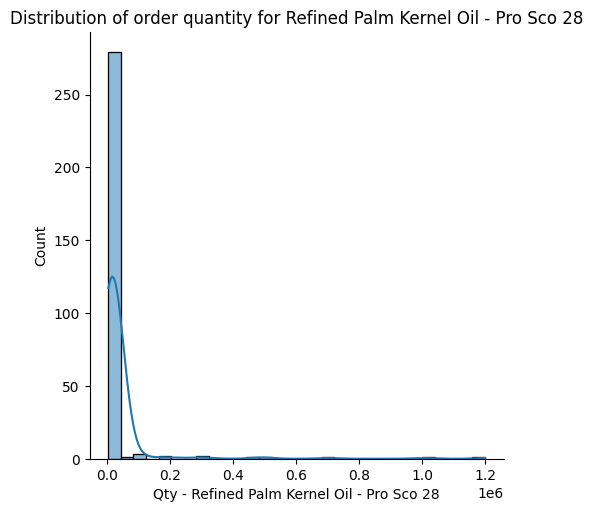

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.displot(f1_df[qty_col],bins=30,kde=True)
plt.title(f'Distribution of order quantity for {material}')
plt.show()

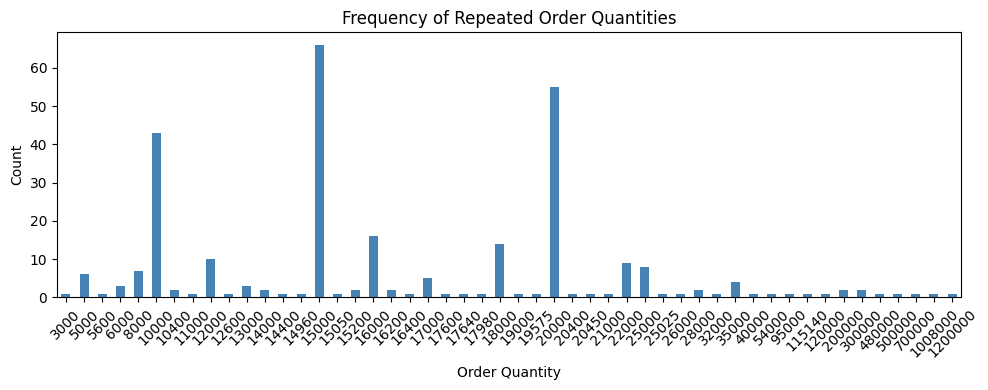

In [90]:
# Frequency of each quantity value
qty_counts = f1_df[qty_col].value_counts().sort_index()

# Plot frequency of repeated quantities
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
qty_counts.plot(kind='bar', color='steelblue')
plt.title("Frequency of Repeated Order Quantities")
plt.xlabel("Order Quantity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [91]:
f1_df[qty_col] = np.log1p(f1_df[qty_col])  # log(1 + x)


<Figure size 1000x800 with 0 Axes>

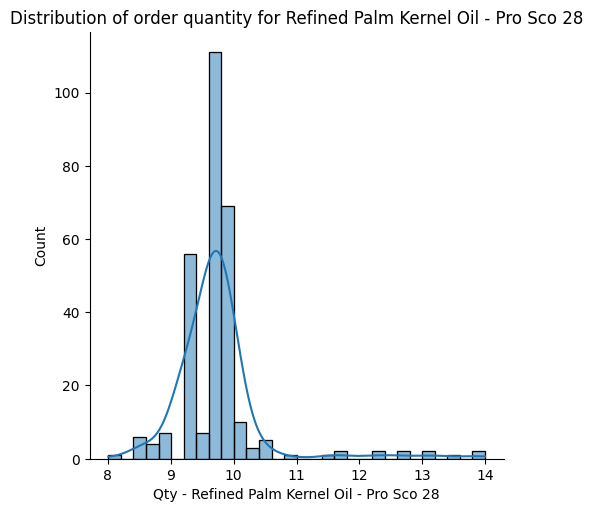

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.displot(f1_df[qty_col],bins=30,kde=True)
plt.title(f'Distribution of order quantity for {material}')
plt.show()

<Figure size 1000x800 with 0 Axes>

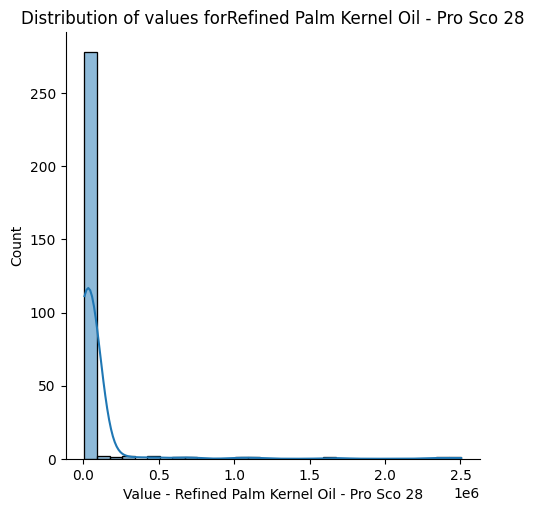

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.displot(f1_df[value_col],bins=30,kde=True)
plt.title(f'Distribution of values for{material}')
plt.show()

In [94]:
f1_df[value_col] = np.log1p(f1_df[value_col])  # log(1 + x)


<Figure size 1000x800 with 0 Axes>

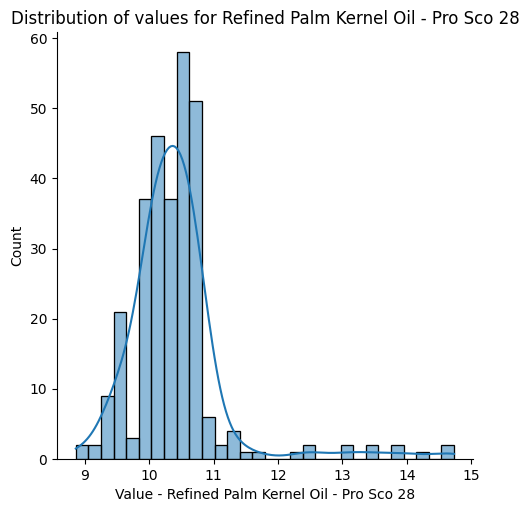

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.displot(f1_df[value_col],bins=30,kde=True)
plt.title(f'Distribution of values for {material}')
plt.show()

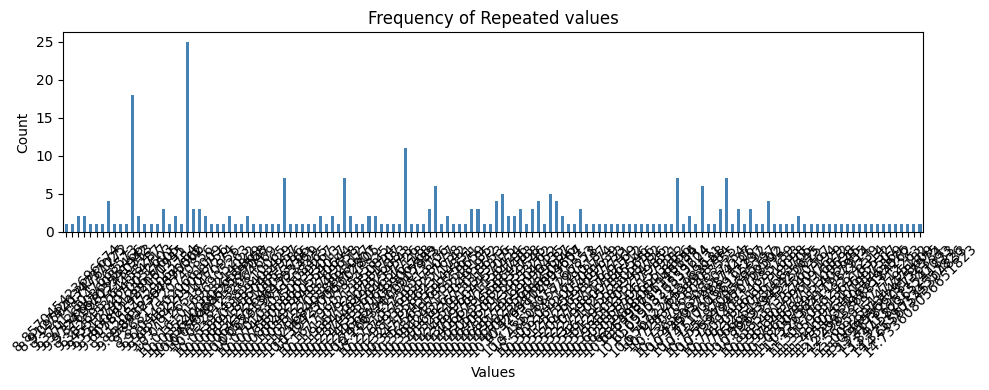

In [96]:
# Frequency of each quantity value
qty_counts = f1_df[value_col].value_counts().sort_index()
#Plot frequency of repeated quantities
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
qty_counts.plot(kind='bar', color='steelblue')
plt.title("Frequency of Repeated values")
plt.xlabel("Values")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

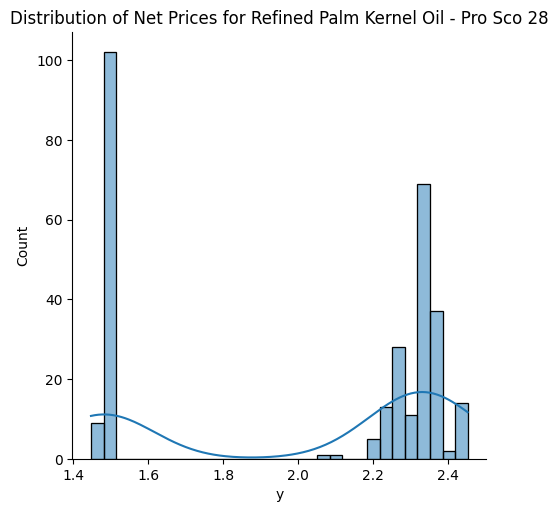

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.displot(f1_df['y'],bins=30,kde=True)
plt.title(f'Distribution of Net Prices for {material}')
plt.show()

In [98]:
# f1_df['y'] = np.log1p(f1_df['y']) # np.log1p(x) computes log(1 + x)

In [99]:
f1_df.isnull().sum()

ds                                              0
Name of Supplier                                0
Qty - Refined Palm Kernel Oil - Pro Sco 28      0
Value - Refined Palm Kernel Oil - Pro Sco 28    0
y                                               0
Brent_Oil_Price_USD                             0
Temperature_C                                   0
Humidity_%                                      0
Rainfall_mm                                     0
holiday_name                                    0
dtype: int64

In [100]:
f1_df.dropna(inplace=True)

In [101]:
# Checking the stationarity
from statsmodels.tsa.stattools import adfuller

result = adfuller(f1_df['y'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] < 0.05:
    print("Series is stationary")
else:
    print("Series is NOT stationary (Prophet can still handle it)")

ADF Statistic: -1.3469500055993795
p-value: 0.6074285069809955
Series is NOT stationary (Prophet can still handle it)


In [102]:
# # Example to apply first-order differencing
# f1_df['y']=f1_df['y']-f1_df['y'].shift(1)
# f1_df.dropna(inplace=True)

# result = adfuller(f1_df['y'])
# print('ADF Statistic:', result[0])
# print('p-value:', result[1])
# if result[1] < 0.05:
#     print("Series is stationary")
# else:
#     print("Series is NOT stationary (Prophet can still handle it)")

In [103]:
# Checking the stationarity
from statsmodels.tsa.stattools import adfuller

result = adfuller(f1_df[qty_col])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] < 0.05:
    print("Series is stationary")
else:
    print("Series is NOT stationary (Prophet can still handle it)")

ADF Statistic: -10.023217481040898
p-value: 1.6578528374291675e-17
Series is stationary


In [104]:
# Checking the stationarity
from statsmodels.tsa.stattools import adfuller

result = adfuller(f1_df[value_col])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] < 0.05:
    print("Series is stationary")
else:
    print("Series is NOT stationary (Prophet can still handle it)")

ADF Statistic: -9.051276082454496
p-value: 4.832478615150628e-15
Series is stationary


Skewness of Net Price (y): -0.4566


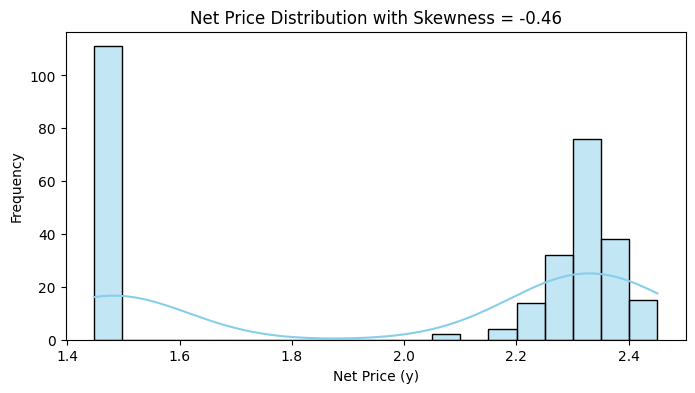

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Skewness value
skew_value = skew(f1_df['y'].dropna())
print(f"Skewness of Net Price (y): {skew_value:.4f}")

# Histogram with KDE
plt.figure(figsize=(8, 4))
sns.histplot(f1_df['y'], kde=True, bins=20, color='skyblue')
plt.title(f"Net Price Distribution with Skewness = {skew_value:.2f}")
plt.xlabel("Net Price (y)")
plt.ylabel("Frequency")
plt.show()


Skewness of Qty (Qty - Refined Palm Kernel Oil - Pro Sco 28): 3.0260


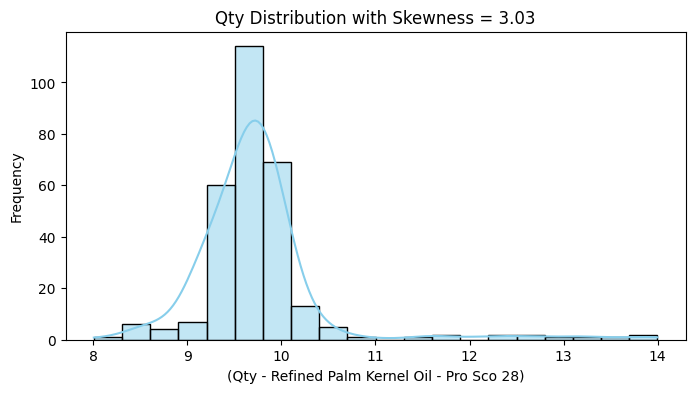

In [106]:
# Skewness value
skew_value = skew(f1_df[qty_col].dropna())
print(f"Skewness of Qty ({qty_col}): {skew_value:.4f}")

# Histogram with KDE
plt.figure(figsize=(8, 4))
sns.histplot(f1_df[qty_col], kde=True, bins=20, color='skyblue')
plt.title(f"Qty Distribution with Skewness = {skew_value:.2f}")
plt.xlabel(f"({qty_col})")
plt.ylabel("Frequency")
plt.show()


In [107]:
f1_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 1 to 1485
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ds                                            292 non-null    object 
 1   Name of Supplier                              292 non-null    object 
 2   Qty - Refined Palm Kernel Oil - Pro Sco 28    292 non-null    float64
 3   Value - Refined Palm Kernel Oil - Pro Sco 28  292 non-null    float64
 4   y                                             292 non-null    float64
 5   Brent_Oil_Price_USD                           292 non-null    float64
 6   Temperature_C                                 292 non-null    float64
 7   Humidity_%                                    292 non-null    float64
 8   Rainfall_mm                                   292 non-null    float64
 9   holiday_name                                  292 non-null    object 

### Forecasting

In [108]:
f1_df

,ds,Name of Supplier,Qty - Refined Palm Kernel Oil - Pro Sco 28,Value - Refined Palm Kernel Oil - Pro Sco 28,y,Brent_Oil_Price_USD,Temperature_C,Humidity_%,Rainfall_mm,holiday_name
1,2024-10-06,1053 Raw and Packs,8.987322,9.382696,1.4850,80.930000,30.14,19.48,0.0,No Holiday
4,2024-10-07,1053 Raw and Packs,9.615872,10.011265,1.4850,80.930000,29.37,18.98,0.0,No Holiday
8,2024-10-08,1053 Raw and Packs,9.210440,9.605822,1.4850,77.180000,27.04,17.18,0.0,No Holiday
12,2024-10-09,1053 Raw and Packs,8.699681,9.095042,1.4850,76.580002,28.36,18.49,0.0,No Holiday
16,2024-10-10,1053 Raw and Packs,9.680406,10.075801,1.4850,79.400002,29.18,17.65,0.0,No Holiday
...,...,...,...,...,...,...,...,...,...,...
1470,2025-10-02,1053 Raw and Packs,9.615872,10.475554,2.3625,64.110001,29.23,16.59,0.0,No Holiday
1474,2025-10-03,1053 Raw and Packs,9.615872,10.475554,2.3625,64.529999,28.69,17.45,0.0,No Holiday
1478,2025-10-04,1053 Raw and Packs,9.903538,10.763229,2.3625,64.529999,27.77,14.21,0.0,No Holiday
1482,2025-10-05,1053 Raw and Packs,9.615872,10.475554,2.3625,64.529999,27.49,12.97,0.0,No Holiday


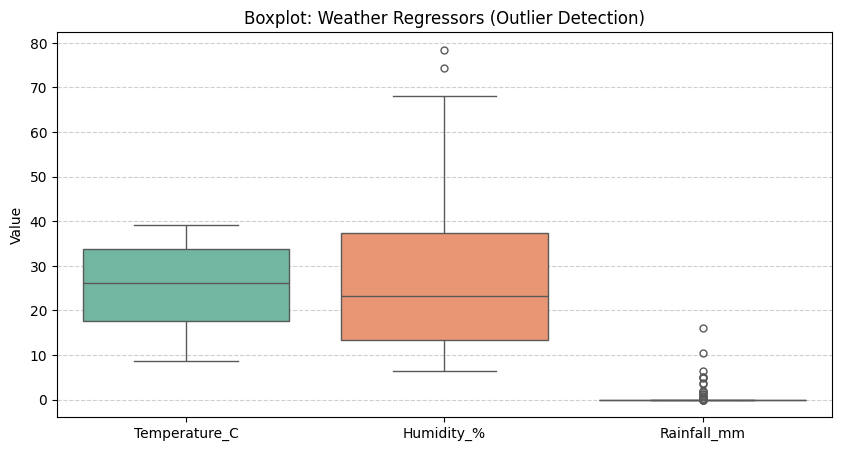

In [152]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=f1_df[['Temperature_C', 'Humidity_%', 'Rainfall_mm']], palette='Set2', fliersize=5)
plt.title("Boxplot: Weather Regressors (Outlier Detection)", fontsize=12)
plt.ylabel("Value")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [153]:
Q1 = df['Rainfall_mm'].quantile(0.25)
Q3 = df['Rainfall_mm'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df['Rainfall_mm'] < lower_bound) | (df['Rainfall_mm'] > upper_bound)]

print(f"Total outliers in Rainfall_mm: {len(outliers)}")
display(outliers[['ds', 'Rainfall_mm']].head(10))


Total outliers in Rainfall_mm: 28


,ds,Rainfall_mm
81,2024-10-27,0.01
82,2024-10-28,0.10
86,2024-10-29,0.06
94,2024-10-31,0.09
175,2024-11-25,0.01
176,2024-11-26,0.11
340,2025-01-07,10.45
358,2025-01-12,1.99
362,2025-01-13,0.82
424,2025-01-26,0.90


Prices of cattle feed and dairy essentials change every week or month because of market demand, weather conditions, oil price changes, and import costs. Different suppliers also offer different rates at different times. If we buy feed during a high-price period or from the wrong supplier, the cost increases. Sometimes suppliers also delay delivery, which can disturb the feeding schedule and affect milk production. By forecasting future prices and checking past supplier performance, we can know the best time to buy and choose reliable suppliers. This helps the farm reduce feed costs, avoid delays, and maintain a steady and healthy feed supply for the cattle.

| Material                                 | Meaning / Use                                                                                                                                       |
| ---------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Promilk 85 / MPC 85**                  | **Milk Protein Concentrate (85% protein)** used to increase protein content / improve texture in dairy.                                             |
| **Skim Milk Powder (MH)**                | **Low-fat powdered milk** used in production of recombined milk, yogurt, laban, etc.                                                                |
| **Refined Palm Kernel Oil – PRO SCO 28** | **Vegetable fat** used in dairy blends, cheese analogs, creams, etc. Depending on specification, it can be for **texture & mouthfeel** improvement. |



📈 PRICE MODEL EVALUATION
MAE : 0.0092
RMSE: 0.0131
R²  : 0.8617


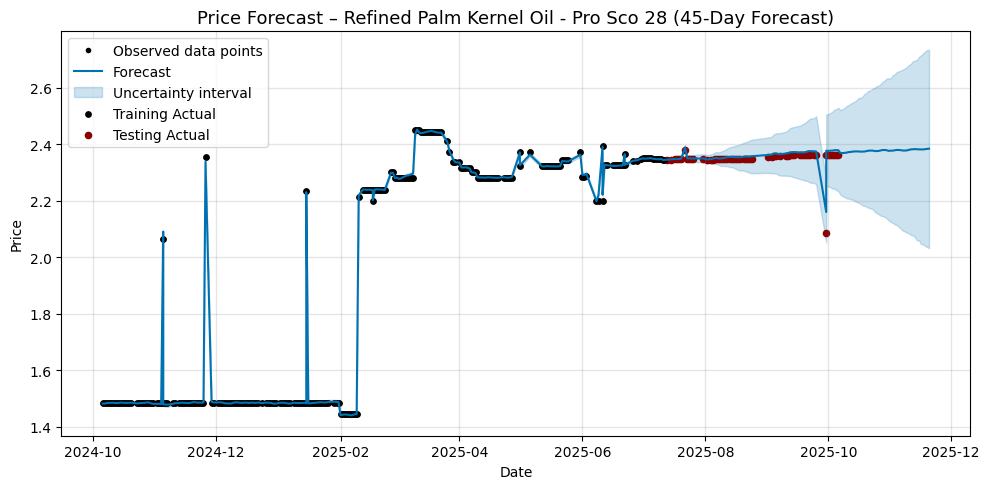

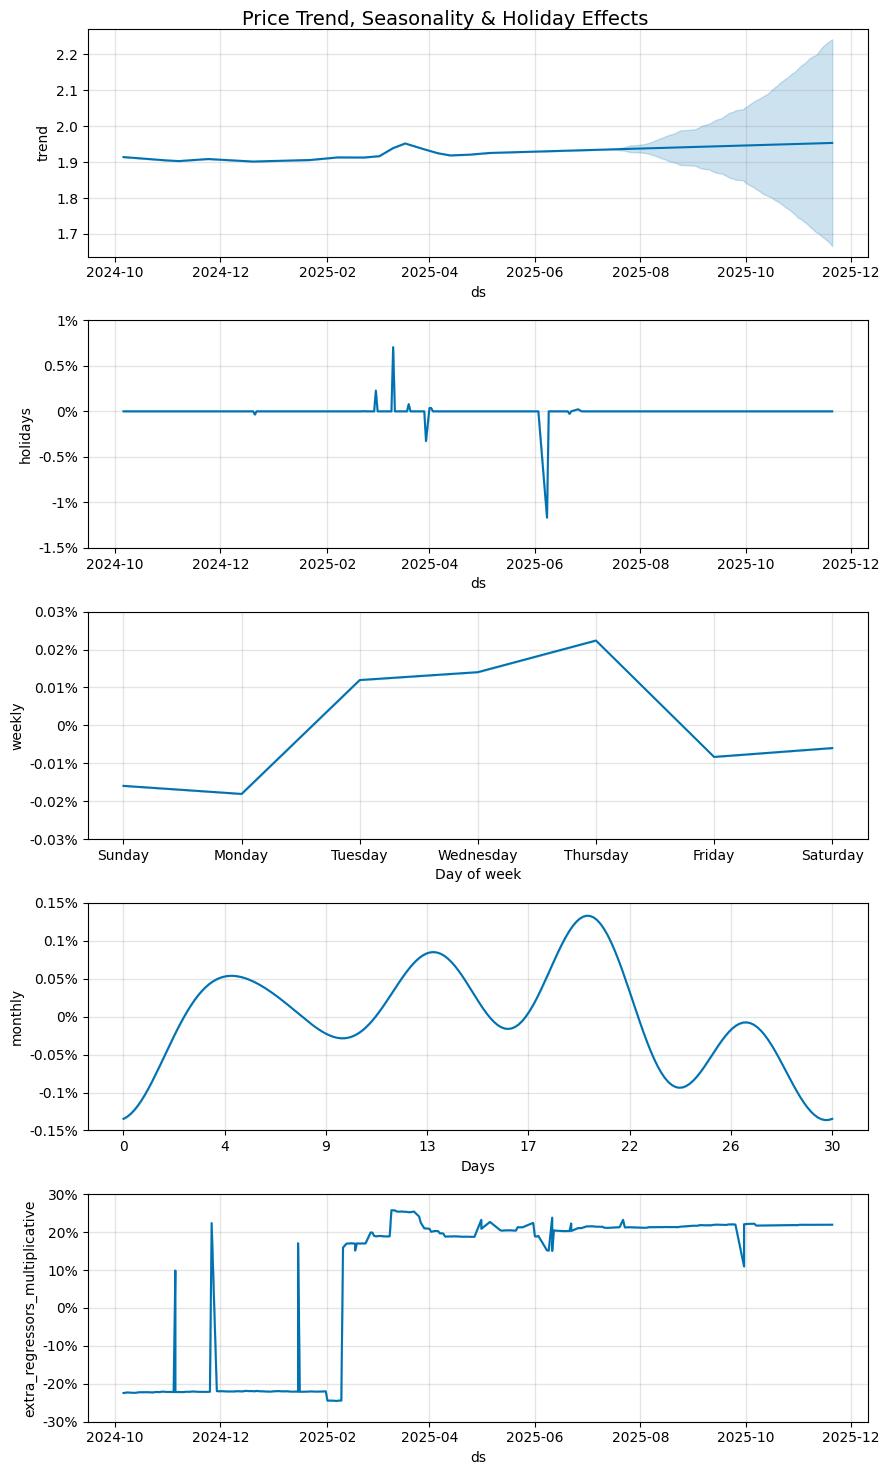

,Supplier Name,Lowest Unit Price,Year-Months
0,1053 Raw and Packs,1.485000,"2024: 10,11,12 | 2025: 1"
1,10000463 INTERNATIONAL FOOD INDUS,2.087100,2025: 9
2,20000216 Emirates Refining Co. LT,2.200000,2025: 2
3,10004172 DELMON PRODUCTS SAUDI CO,2.232630,2025: 1


,Supplier Name,Lowest Predicted Unit Price,Year-Months
0,1053 Raw and Packs,2.374327,2025: 10


,Historical Best Supplier,Historical Lowest Price,Future Best Supplier,Future Lowest Predicted Price
0,1053 Raw and Packs,1.485000,1053 Raw and Packs,2.374327


In [ ]:
# 📦 Supplier-wise Prophet Forecasting with Holiday, Oil & Weather Regressor

from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import logging
logging.getLogger("cmdstanpy").disabled = True


# 0) DATA PREP
f1_df['ds'] = pd.to_datetime(f1_df['ds'])

prophet_holidays = (
    f1_df[f1_df['holiday_name'] != "No Holiday"][['ds', 'holiday_name']]
    .rename(columns={'holiday_name': 'holiday'})
).drop_duplicates()

# Adding future holidays manually
future_holidays = pd.DataFrame({
    'ds': pd.to_datetime([
        '2025-12-21',   
        '2026-02-18',   
        '2026-02-22',   
        '2026-03-11',   
        '2026-03-20',
        '2026-03-21',
        '2026-03-22',   
    ]),
    'holiday': [
        'December Solstice (Season)',
        'Ramadan begins (Observance)',
        'Founding Day (National holiday)',
        'Flag Day (Observance)',
        'Eid al-Fitr (National holiday), March Equinox (Season)',
        'Eid al-Fitr Holiday (National holiday)',
        'Eid al-Fitr Holiday (National holiday)'
    ]
})

prophet_holidays = pd.concat([prophet_holidays, future_holidays], ignore_index=True).drop_duplicates()
#------------------------------------------
# --- SUPPLIER ENCODING (Simple Skip on Re-run) ---

if 'Name of Supplier' in f1_df.columns:   
    le = LabelEncoder()
    f1_df['Supplier Name'] = le.fit_transform(f1_df['Name of Supplier'])
    supplier_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    f1_df.drop(columns=['Name of Supplier'], inplace=True)
else:
    # Assuming le is defined if 'Name of Supplier' was present in a prior run
    class DummyLabelEncoder:
        def inverse_transform(self, x):
            return x
    try:
        le
    except NameError:
        le = DummyLabelEncoder()

# --- FIX RAINFALL TYPE ---
f1_df['Rainfall_mm'] = pd.to_numeric(f1_df['Rainfall_mm'], errors='coerce')

#--------------------------------------------
# Supplier name is already encoded outside
supplier_col = 'Supplier Name'

# No ffill/bfill here (you cleaned it externally)

use_cols = ['ds', 'y', supplier_col, qty_col, value_col,
             'Brent_Oil_Price_USD', 'Temperature_C', 'Humidity_%', 'Rainfall_mm', 'holiday_name']

df = f1_df[use_cols].copy().sort_values('ds')

# 1) TRAIN / TEST SPLIT
split_index = int(len(df) * 0.8)
train_df = df.iloc[:split_index].copy()
test_df  = df.iloc[split_index:].copy()

# 2) PROPHET MODEL
price_model = Prophet(
    holidays=prophet_holidays,              # include custom holiday effects in the forecast (adds spikes/dips around holidays)
    seasonality_mode='multiplicative',      # allows seasonal effects to scale with the overall trend (useful when data grows over time)
    changepoint_prior_scale=0.08,           # controls trend flexibility (higher = more responsive to sudden trend shifts)
    seasonality_prior_scale=12.0,           # controls strength of seasonal patterns (higher = stronger seasonality influence)
    interval_width=0.9,                     # sets the confidence interval for predictions (90% uncertainty band)
    yearly_seasonality=False,               # disables Prophet’s default yearly seasonality (handled manually if needed)
    weekly_seasonality=True,                # enables weekly seasonality (captures weekday/weekend effects)
    daily_seasonality=False                 # disables daily seasonality (not needed for business-level data)
)


price_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

price_model.add_regressor(supplier_col)
price_model.add_regressor(qty_col)
price_model.add_regressor(value_col)
price_model.add_regressor('Brent_Oil_Price_USD')
price_model.add_regressor('Temperature_C')
price_model.add_regressor('Humidity_%')
price_model.add_regressor('Rainfall_mm')

price_model.fit(train_df[['ds','y',supplier_col,qty_col,value_col,
                           'Brent_Oil_Price_USD','Temperature_C','Humidity_%','Rainfall_mm']])

# 3) EVALUATION ON TEST
future_test = test_df[['ds', supplier_col, qty_col, value_col,
                        'Brent_Oil_Price_USD','Temperature_C','Humidity_%','Rainfall_mm']].copy()

forecast_test = price_model.predict(future_test)

mae = mean_absolute_error(test_df['y'], forecast_test['yhat'])
rmse = np.sqrt(mean_squared_error(test_df['y'], forecast_test['yhat']))
r2 = r2_score(test_df['y'], forecast_test['yhat'])

print("\n📈 PRICE MODEL EVALUATION")
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²  : {r2:.4f}")


# # 3B) TRAIN METRICS - (Original Code Block)
# future_train = train_df[['ds', supplier_col, qty_col, value_col,
#                           'Brent_Oil_Price_USD','Temperature_C','Humidity_%','Rainfall_mm']].copy()

# forecast_train = price_model.predict(future_train)

# mae_train = mean_absolute_error(train_df['y'], forecast_train['yhat'])
# rmse_train = np.sqrt(mean_squared_error(train_df['y'], forecast_train['yhat']))
# r2_train = r2_score(train_df['y'], forecast_train['yhat'])

# print("\n🎯 PRICE MODEL EVALUATION (70% TRAIN DATA)")
# print(f"MAE : {mae_train:.4f}")
# print(f"RMSE: {rmse_train:.4f}")
# print(f"R²  : {r2_train:.4f}")

# # 4) FUTURE 45-DAY FORECAST (Hybrid Method Instead of Last-Known Copy)
N_DAYS = 45
future_dates = pd.date_range(df['ds'].max(), periods=N_DAYS + 1, freq='D')[1:]
future_regressors = pd.DataFrame({'ds': future_dates})

# ----------------- SUGGESTED CHANGES START HERE -----------------

# --- A) Forecast Oil Price Using Prophet (more stable trend/seasonality)
try:
    oil_prophet = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
    oil_prophet.fit(df[['ds', 'Brent_Oil_Price_USD']].rename(columns={'Brent_Oil_Price_USD': 'y'}))
    future_oil_df = oil_prophet.make_future_dataframe(periods=N_DAYS, include_history=False)
    future_oil_forecast = oil_prophet.predict(future_oil_df)['yhat']
    future_regressors['Brent_Oil_Price_USD'] = list(future_oil_forecast)
except Exception as e:
    # Fallback to last known value if Prophet fails (for stability)
    print(f"⚠️ Prophet Oil Forecast failed: {e}. Falling back to last observed value.")
    future_regressors['Brent_Oil_Price_USD'] = df['Brent_Oil_Price_USD'].iloc[-1]

# --- B) Use Monthly Climate Seasonal Averages For Weather (Keep existing method)
month_avg_weather = df.groupby(df['ds'].dt.month)[['Temperature_C','Humidity_%','Rainfall_mm']].mean()

future_regressors['Temperature_C'] = future_regressors['ds'].dt.month.map(month_avg_weather['Temperature_C'])
future_regressors['Humidity_%']    = future_regressors['ds'].dt.month.map(month_avg_weather['Humidity_%'])
future_regressors['Rainfall_mm']   = future_regressors['ds'].dt.month.map(month_avg_weather['Rainfall_mm'])

# --- C) Use Last Known Value for Quantity (Avoid rolling mean discontinuity)
future_regressors[qty_col] = df[qty_col].iloc[-1]

# --- D) Recalculate Value Based on a RECENT Avg Price Ratio (Avoid total historical average shock)
# Use a recent 30-day window for a more relevant ratio
recent_df = df.tail(30)
if recent_df[qty_col].sum() > 0:
    ratio = (recent_df[value_col].sum() / recent_df[qty_col].sum())
else:
    ratio = 1 # Fallback
future_regressors[value_col] = future_regressors[qty_col] * ratio

# --- E) Supplier Remains Same (Keep existing method)
future_regressors[supplier_col] = df[supplier_col].iloc[-1]

# ----------------- SUGGESTED CHANGES END HERE -----------------


# 5) FINAL FORECAST
history_df = df[['ds', supplier_col, qty_col, value_col,
                  'Brent_Oil_Price_USD','Temperature_C','Humidity_%','Rainfall_mm']].copy()

future_full = pd.concat([history_df, future_regressors], ignore_index=True)
forecast_full = price_model.predict(future_full)

future_forecast_only = forecast_full[forecast_full['ds'] >= future_dates.min()].copy()

future_regressors = future_regressors.merge(
    future_forecast_only[['ds','yhat','yhat_lower','yhat_upper']],
    on='ds', how='left'
)

# 6) VISUALS
fig = price_model.plot(forecast_full, figsize=(10, 5))
plt.scatter(train_df['ds'], train_df['y'], color='black',  s=15, label='Training Actual')
plt.scatter(test_df['ds'],  test_df['y'],  color='#8B0000', s=20, label='Testing Actual')
plt.title(f"Price Forecast – {material} ({N_DAYS}-Day Forecast)", fontsize=13)
plt.xlabel("Date"); plt.ylabel("Price")
plt.legend(); plt.tight_layout(); plt.show()

price_model.plot_components(forecast_full)
plt.suptitle("Price Trend, Seasonality & Holiday Effects", fontsize=14)
plt.tight_layout(); plt.show()


# 7) HISTORICAL SUPPLIER ANALYSIS (with weather + holiday context, no decode)

df_historical = df.copy()
df_historical['Rainfall_mm'] = pd.to_numeric(df_historical['Rainfall_mm'], errors='coerce') # errors convert invalid values into NaN

df_historical['year']  = df_historical['ds'].dt.year
df_historical['month'] = df_historical['ds'].dt.month
df_historical['weekday'] = df_historical['ds'].dt.day_name()
df_historical['day']     = df_historical['ds'].dt.day

# Avg price by supplier / year / month
avg_price_hist_month = (
    df_historical.groupby([supplier_col, 'year', 'month'])['y']
    .mean().reset_index()
)
avg_price_hist_month['y_rounded'] = avg_price_hist_month['y'].round(6)

# Lowest price each supplier has ever given
min_price_per_supplier = (
    avg_price_hist_month.groupby(supplier_col)['y_rounded']
    .min().reset_index().rename(columns={'y_rounded': 'Lowest Unit Price'})
)

merged = avg_price_hist_month.merge(min_price_per_supplier, on=supplier_col, how='inner')
merged = merged[np.isclose(merged['y_rounded'], merged['Lowest Unit Price'], atol=1e-6)]

def combine_years_months(group):
    year_month = {}
    for _, row in group.iterrows():
        year_month.setdefault(int(row['year']), []).append(int(row['month']))
    return " | ".join(f"{yr}: {','.join(map(str, sorted(set(ms))))}" 
                      for yr, ms in sorted(year_month.items()))

final_best_hist = (
    merged.groupby([supplier_col, 'Lowest Unit Price'])
    .apply(combine_years_months).reset_index().rename(columns={0: 'Year-Months'})
    .sort_values('Lowest Unit Price').reset_index(drop=True)
)

# Decode supplier names if possible
try:
    final_best_hist['Supplier Name'] = le.inverse_transform(final_best_hist['Supplier Name'].round().astype(int))
except:
    pass

display(HTML("<h4>📊 Supplier-wise Lowest Monthly Unit Price (Historical Data)</h4>"))
display(final_best_hist.style.background_gradient(cmap='YlGnBu'))

# ---- IDENTIFY BEST OVERALL SUPPLIER + PERIOD ----
best_overall_hist = final_best_hist.loc[final_best_hist['Lowest Unit Price'].idxmin()]
best_supplier_hist      = best_overall_hist[supplier_col]
best_price_hist         = best_overall_hist['Lowest Unit Price']
best_year_months_hist   = best_overall_hist['Year-Months']

# ---- NEW EXACT BEST DATE LOGIC ----
hist_year_month_pairs = best_year_months_hist.split('|')
hist_year_month_list = []

for pair in hist_year_month_pairs:
    yr = int(pair.split(':')[0])
    months = [int(m) for m in pair.split(':')[1].split(',')]
    for m in months:
        hist_year_month_list.append((yr, m))

hist_mask = False
for yr, m in hist_year_month_list:
    hist_mask |= ((df_historical['year'] == yr) & (df_historical['month'] == m))

hist_best_df = df_historical.loc[hist_mask].copy()

best_weekday_hist = hist_best_df.groupby('weekday')['y'].mean().idxmin()
best_day_hist = hist_best_df.groupby('day')['y'].mean().idxmin()

best_row_hist = hist_best_df.loc[hist_best_df['y'].idxmin()]
best_exact_date_hist = best_row_hist['ds']
best_exact_price_hist = best_row_hist['y']
best_exact_weekday_hist = best_row_hist['weekday']

# ---- WEATHER & HOLIDAY CONTEXT ----
first_pair = best_year_months_hist.split('|')[0].strip()
yr = int(first_pair.split(':')[0])
months = [int(m) for m in first_pair.split(':')[1].split(',')]

ctx_mask = (df_historical['year']==yr) & (df_historical['month'].isin(months))
ctx = df_historical.loc[ctx_mask]

avg_temp_hist = ctx['Temperature_C'].mean()
avg_hum_hist  = ctx['Humidity_%'].mean()
avg_rain_hist = ctx['Rainfall_mm'].astype(float).mean()

holiday_hist = (
    df_historical.loc[(df_historical['holiday_name']!="No Holiday") & ctx_mask,
                      ['ds','holiday_name']]
    .sort_values('ds')
    .head(1)
)

holiday_note_hist = (
    holiday_hist['holiday_name'].iloc[0] + " on " +
    holiday_hist['ds'].dt.strftime("%Y-%m-%d").iloc[0]
) if len(holiday_hist) else "None in selected months"

html_hist = f"""
<h4>🏆 BEST HISTORICAL SUPPLIER & TIME TO BUY <span style='color:#007bff;'>{material}</span></h4>
<p>
🏭 <b>Supplier:</b> <span style='color:yellow;'>{best_supplier_hist}</span><br>
💰 <b>Lowest Average Unit Price:</b> <span style='color:#52FFD1;'>{best_price_hist:.6f}</span><br>
📅 <b>Lowest Price Months:</b> <span style='color:#52FFD1;'>{best_year_months_hist}</span><br><br>

📌 <b>Best Exact Purchase Date:</b> <span style='color:#52FFD1;'>{best_exact_date_hist.date()} ({best_exact_weekday_hist})</span><br>
💲 <b>Price on Best Exact Date:</b> <span style='color:#52FFD1;'>{best_exact_price_hist:.6f}</span><br><br>

🗓️ <b>Best Weekday (within lowest-price months):</b> <span style='color:#52FFD1;'>{best_weekday_hist}</span><br>
📉 <b>Best Day-of-Month (within lowest-price months):</b> <span style='color:#52FFD1;'>{best_day_hist}</span><br><br>

🌡️ <b>Avg Temp:</b> <span style='color:#ff7f0e;'>{avg_temp_hist:.2f}</span> °C &nbsp;|&nbsp;
💧 <b>Avg Humidity:</b> <span style='color:#1f77b4;'>{avg_hum_hist:.2f}</span> % &nbsp;|&nbsp;
🌧️ <b>Avg Rainfall:</b> <span style='color:#2ca02c;'>{avg_rain_hist:.4f}</span> mm/day<br>
📅 <b>Nearest Holiday:</b> <span style='color:#8a2be2;'>{holiday_note_hist}</span>
</p>
"""
display(HTML(html_hist))


# 8) FUTURE SUPPLIER ANALYSIS (with weather + holiday context, no decode)

df_future = future_regressors.copy()
df_future['Rainfall_mm'] = pd.to_numeric(df_future['Rainfall_mm'], errors='coerce')

df_future['ds']     = pd.to_datetime(df_future['ds'])
df_future['year']   = df_future['ds'].dt.year
df_future['month']  = df_future['ds'].dt.month
df_future['weekday']= df_future['ds'].dt.day_name()
df_future['day']    = df_future['ds'].dt.day

# Avg predicted price per month
avg_price_future_month = (
    df_future.groupby([supplier_col, 'year', 'month'])['yhat']
    .mean().reset_index()
)
avg_price_future_month['yhat_rounded'] = avg_price_future_month['yhat'].round(6)

min_price_per_supplier_future = (
    avg_price_future_month.groupby(supplier_col)['yhat_rounded']
    .min().reset_index().rename(columns={'yhat_rounded': 'Lowest Predicted Unit Price'})
)

merged_future = avg_price_future_month.merge(min_price_per_supplier_future, on=supplier_col, how='inner')
merged_future = merged_future[np.isclose(merged_future['yhat_rounded'], merged_future['Lowest Predicted Unit Price'], atol=1e-6)]

final_best_future = (
    merged_future.groupby([supplier_col, 'Lowest Predicted Unit Price'])
    .apply(combine_years_months).reset_index().rename(columns={0: 'Year-Months'})
    .sort_values('Lowest Predicted Unit Price').reset_index(drop=True)
)

# Decode supplier names
try:
    final_best_future['Supplier Name'] = le.inverse_transform(final_best_future['Supplier Name'].round().astype(int))
except:
    pass

display(HTML("<h4>📈 Supplier-wise Lowest Predicted Monthly Unit Price (Next 45 Days)</h4>"))
display(final_best_future.style.background_gradient(cmap='YlOrBr'))

best_overall_future   = final_best_future.loc[final_best_future['Lowest Predicted Unit Price'].idxmin()]
best_supplier_future  = best_overall_future[supplier_col]
best_price_future     = best_overall_future['Lowest Predicted Unit Price']
best_year_months_future = best_overall_future['Year-Months']

# ---- NEW EXACT BEST FUTURE DATE LOGIC ----
future_year_month_pairs = best_year_months_future.split('|')
future_year_month_list = []

for pair in future_year_month_pairs:
    pair = pair.strip()
    yr_f = int(pair.split(':')[0])
    months_f = [int(m) for m in pair.split(':')[1].split(',')]
    for m in months_f:
        future_year_month_list.append((yr_f, m))

future_mask = False
for yr_f, m in future_year_month_list:
    future_mask |= ((df_future['year']==yr_f) & (df_future['month']==m))

best_future_df = df_future.loc[future_mask].copy()

best_weekday_future = best_future_df.groupby('weekday')['yhat'].mean().idxmin()
best_day_future     = best_future_df.groupby('day')['yhat'].mean().idxmin()

best_row_future = best_future_df.loc[best_future_df['yhat'].idxmin()]
best_exact_date = best_row_future['ds']
best_exact_price = best_row_future['yhat']
best_exact_weekday = best_row_future['weekday']

# ---- WEATHER & HOLIDAY CONTEXT ----
first_pair_f = best_year_months_future.split('|')[0].strip()
yr_f = int(first_pair_f.split(':')[0])
months_f = [int(m) for m in first_pair_f.split(':')[1].split(',')]

ctx_mask_f = (df_future['year']==yr_f) & (df_future['month'].isin(months_f))
ctx_f = df_future.loc[ctx_mask_f]

avg_temp_f = ctx_f['Temperature_C'].mean()
avg_hum_f  = ctx_f['Humidity_%'].mean()
avg_rain_f = ctx_f['Rainfall_mm'].astype(float).mean()

holiday_future = (
    df.loc[(df['holiday_name']!="No Holiday") &
           (df['ds'].dt.year==yr_f) &
           (df['ds'].dt.month.isin(months_f)),
           ['ds','holiday_name']]
    .sort_values('ds')
    .head(1)
)

holiday_note_future = (
    holiday_future['holiday_name'].iloc[0] + " on " +
    holiday_future['ds'].dt.strftime("%Y-%m-%d").iloc[0]
) if len(holiday_future) else "None in selected months"

html_future = f"""
<h4>🔮 BEST FUTURE SUPPLIER & TIME TO BUY <span style='color:#007bff;'>{material}</span></h4>
<p>
🏭 <b>Supplier:</b> <span style='color:yellow;'>{best_supplier_future}</span><br>
💰 <b>Lowest Predicted Monthly Avg Price:</b> <span style='color:#52FFD1;'>{best_price_future:.6f}</span><br>
📅 <b>Best Future Months:</b> <span style='color:#52FFD1;'>{best_year_months_future}</span><br><br>

📌 <b>Best Exact Purchase Date:</b> <span style='color:#52FFD1;'>{best_exact_date.date()} ({best_exact_weekday})</span><br>
💲 <b>Predicted Price on Best Day:</b> <span style='color:#52FFD1;'>{best_exact_price:.6f}</span><br><br>

🗓️ <b>Best Weekday (within best months):</b> <span style='color:#52FFD1;'>{best_weekday_future}</span><br>
📉 <b>Best Day-of-Month (within best months):</b> <span style='color:#52FFD1;'>{best_day_future}</span><br><br>

🌡️ Avg Temp (Best Month): <span style='color:#ff7f0e;'>{avg_temp_f:.2f}</span> °C &nbsp;|&nbsp;
💧 Avg Humidity: <span style='color:#1f77b4;'>{avg_hum_f:.2f}</span> % &nbsp;|&nbsp;
🌧️ Avg Rainfall: <span style='color:#2ca02c;'>{avg_rain_f:.4f}</span> mm/day<br>
📅 Nearest Holiday: <span style='color:#8a2be2;'>{holiday_note_future}</span>
</p>
"""
display(HTML(html_future))


# 9) COMPARISON SUMMARY (no supplier decode, same output format)
compare_df = pd.DataFrame({
    'Historical Best Supplier': [best_supplier_hist],
    'Historical Lowest Price':  [best_price_hist],
    'Future Best Supplier':     [best_supplier_future],
    'Future Lowest Predicted Price': [best_price_future]
})

display(HTML("<h4>⚖️ Comparison: Historical vs Forecasted Best Supplier</h4>"))
display(compare_df.style.background_gradient(cmap='coolwarm'))

In [141]:
df_xgb

,ds,y,Supplier Name,Qty - Refined Palm Kernel Oil - Pro Sco 28,Value - Refined Palm Kernel Oil - Pro Sco 28,Brent_Oil_Price_USD,Temperature_C,Humidity_%,Rainfall_mm,holiday_name
1,2024-10-06,1.4850,2,8.987322,9.382696,80.930000,30.14,19.48,0.0,No Holiday
4,2024-10-07,1.4850,2,9.615872,10.011265,80.930000,29.37,18.98,0.0,No Holiday
8,2024-10-08,1.4850,2,9.210440,9.605822,77.180000,27.04,17.18,0.0,No Holiday
12,2024-10-09,1.4850,2,8.699681,9.095042,76.580002,28.36,18.49,0.0,No Holiday
16,2024-10-10,1.4850,2,9.680406,10.075801,79.400002,29.18,17.65,0.0,No Holiday
...,...,...,...,...,...,...,...,...,...,...
1470,2025-10-02,2.3625,2,9.615872,10.475554,64.110001,29.23,16.59,0.0,No Holiday
1474,2025-10-03,2.3625,2,9.615872,10.475554,64.529999,28.69,17.45,0.0,No Holiday
1478,2025-10-04,2.3625,2,9.903538,10.763229,64.529999,27.77,14.21,0.0,No Holiday
1482,2025-10-05,2.3625,2,9.615872,10.475554,64.529999,27.49,12.97,0.0,No Holiday


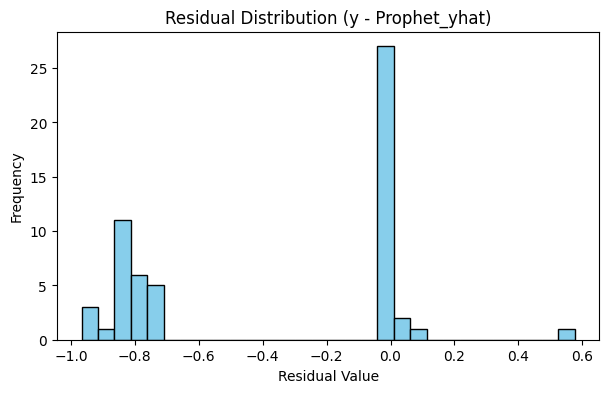

In [142]:
plt.figure(figsize=(7,4))
plt.hist(train_like_df['residual'], bins=30, color='skyblue', edgecolor='black')
plt.title("Residual Distribution (y - Prophet_yhat)")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.show()


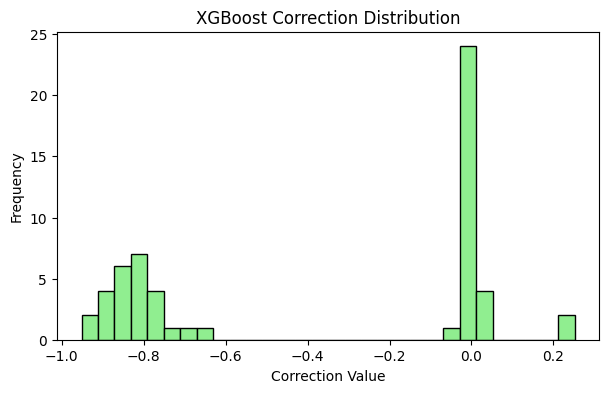

In [143]:
plt.figure(figsize=(7,4))
plt.hist(train_like_df['xgb_correction'], bins=30, color='lightgreen', edgecolor='black')
plt.title("XGBoost Correction Distribution")
plt.xlabel("Correction Value")
plt.ylabel("Frequency")
plt.show()


In [149]:
future_regressors

,ds,Brent_Oil_Price_USD,Temperature_C,Humidity_%,Rainfall_mm,Qty - Refined Palm Kernel Oil - Pro Sco 28,Value - Refined Palm Kernel Oil - Pro Sco 28,Supplier Name,yhat,yhat_lower,yhat_upper
0,2025-10-07,63.161321,27.5300,23.620667,0.008667,9.903538,10.757914,2,2.368611,2.221349,2.520067
1,2025-10-08,63.084330,27.5300,23.620667,0.008667,9.903538,10.757914,2,2.368168,2.215867,2.523272
2,2025-10-09,62.293171,27.5300,23.620667,0.008667,9.903538,10.757914,2,2.369074,2.213581,2.527775
3,2025-10-10,62.049079,27.5300,23.620667,0.008667,9.903538,10.757914,2,2.369781,2.208238,2.534340
4,2025-10-11,61.549275,27.5300,23.620667,0.008667,9.903538,10.757914,2,2.371423,2.207535,2.537456
5,2025-10-12,61.190293,27.5300,23.620667,0.008667,9.903538,10.757914,2,2.372405,2.204722,2.542857
6,2025-10-13,60.078375,27.5300,23.620667,0.008667,9.903538,10.757914,2,2.373298,2.204006,2.547159
7,2025-10-14,59.663160,27.5300,23.620667,0.008667,9.903538,10.757914,2,2.374106,2.199579,2.550215
8,2025-10-15,59.653657,27.5300,23.620667,0.008667,9.903538,10.757914,2,2.373963,2.195648,2.554662
9,2025-10-16,58.968720,27.5300,23.620667,0.008667,9.903538,10.757914,2,2.374101,2.192493,2.562885


In [ ]:
# # 📦 Supplier-wise Prophet Forecasting with Holiday, Oil & Weather Regressor

# from prophet import Prophet
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import pandas as pd
# import numpy as np
# from IPython.display import display, HTML
# import matplotlib.pyplot as plt
# import logging
# logging.getLogger("cmdstanpy").disabled = True


# # 0) DATA PREP
# f1_df['ds'] = pd.to_datetime(f1_df['ds'])

# prophet_holidays = (
#     f1_df[f1_df['holiday_name'] != "No Holiday"][['ds', 'holiday_name']]
#     .rename(columns={'holiday_name': 'holiday'})
# ).drop_duplicates()

# # Adding future holidays manually
# future_holidays = pd.DataFrame({
#     'ds': pd.to_datetime([
#         '2025-12-21',   
#         '2026-02-18',   
#         '2026-02-22',   
#         '2026-03-11',   
#         '2026-03-20',
#         '2026-03-21',
#         '2026-03-22',   
#     ]),
#     'holiday': [
#         'December Solstice (Season)',
#         'Ramadan begins (Observance)',
#         'Founding Day (National holiday)',
#         'Flag Day (Observance)',
#         'Eid al-Fitr (National holiday), March Equinox (Season)',
#         'Eid al-Fitr Holiday (National holiday)',
#         'Eid al-Fitr Holiday (National holiday)'
#     ]
# })

# prophet_holidays = pd.concat([prophet_holidays, future_holidays], ignore_index=True).drop_duplicates()
# #------------------------------------------
# # --- SUPPLIER ENCODING (Simple Skip on Re-run) ---
# from sklearn.preprocessing import LabelEncoder

# if 'Name of Supplier' in f1_df.columns:   
#     le = LabelEncoder()
#     f1_df['Supplier Name'] = le.fit_transform(f1_df['Name of Supplier'])
#     supplier_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
#     f1_df.drop(columns=['Name of Supplier'], inplace=True)
# else:
#     # Assuming le is defined if 'Name of Supplier' was present in a prior run
#     class DummyLabelEncoder:
#         def inverse_transform(self, x):
#             return x
#     try:
#         le
#     except NameError:
#         le = DummyLabelEncoder()

# # --- FIX RAINFALL TYPE ---
# f1_df['Rainfall_mm'] = pd.to_numeric(f1_df['Rainfall_mm'], errors='coerce')

# #--------------------------------------------
# # Supplier name is already encoded outside
# supplier_col = 'Supplier Name'

# # No ffill/bfill here (you cleaned it externally)

# use_cols = ['ds', 'y', supplier_col, qty_col, value_col,
#              'Brent_Oil_Price_USD', 'Temperature_C', 'Humidity_%', 'Rainfall_mm', 'holiday_name']

# df = f1_df[use_cols].copy().sort_values('ds')

# # 1) TRAIN / TEST SPLIT
# split_index = int(len(df) * 0.8)
# train_df = df.iloc[:split_index].copy()
# test_df  = df.iloc[split_index:].copy()

# # 2) PROPHET MODEL
# price_model = Prophet(
#     holidays=prophet_holidays,
#     seasonality_mode='multiplicative',
#     changepoint_prior_scale=0.05,
#     seasonality_prior_scale=10.0,
#     interval_width=0.9,
#     yearly_seasonality=False,
#     weekly_seasonality=True,
#     daily_seasonality=False
# )
# price_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# price_model.add_regressor(supplier_col)
# price_model.add_regressor(qty_col)
# price_model.add_regressor(value_col)
# price_model.add_regressor('Brent_Oil_Price_USD')
# price_model.add_regressor('Temperature_C')
# price_model.add_regressor('Humidity_%')
# price_model.add_regressor('Rainfall_mm')

# price_model.fit(train_df[['ds','y',supplier_col,qty_col,value_col,
#                            'Brent_Oil_Price_USD','Temperature_C','Humidity_%','Rainfall_mm']])

# # 3) EVALUATION ON TEST
# future_test = test_df[['ds', supplier_col, qty_col, value_col,
#                         'Brent_Oil_Price_USD','Temperature_C','Humidity_%','Rainfall_mm']].copy()

# forecast_test = price_model.predict(future_test)

# mae = mean_absolute_error(test_df['y'], forecast_test['yhat'])
# rmse = np.sqrt(mean_squared_error(test_df['y'], forecast_test['yhat']))
# r2 = r2_score(test_df['y'], forecast_test['yhat'])

# print("\n📈 PRICE MODEL EVALUATION")
# print(f"MAE : {mae:.4f}")
# print(f"RMSE: {rmse:.4f}")
# print(f"R²  : {r2:.4f}")


# # # 3B) TRAIN METRICS - (Original Code Block)
# # future_train = train_df[['ds', supplier_col, qty_col, value_col,
# #                           'Brent_Oil_Price_USD','Temperature_C','Humidity_%','Rainfall_mm']].copy()

# # forecast_train = price_model.predict(future_train)

# # mae_train = mean_absolute_error(train_df['y'], forecast_train['yhat'])
# # rmse_train = np.sqrt(mean_squared_error(train_df['y'], forecast_train['yhat']))
# # r2_train = r2_score(train_df['y'], forecast_train['yhat'])

# # print("\n🎯 PRICE MODEL EVALUATION (70% TRAIN DATA)")
# # print(f"MAE : {mae_train:.4f}")
# # print(f"RMSE: {rmse_train:.4f}")
# # print(f"R²  : {r2_train:.4f}")

# # # 4) FUTURE 45-DAY FORECAST (Hybrid Method Instead of Last-Known Copy)
# N_DAYS = 45
# future_dates = pd.date_range(df['ds'].max(), periods=N_DAYS + 1, freq='D')[1:]
# future_regressors = pd.DataFrame({'ds': future_dates})

# # ----------------- SUGGESTED CHANGES START HERE -----------------

# # --- A) Forecast Oil Price Using Prophet (more stable trend/seasonality)
# try:
#     oil_prophet = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
#     oil_prophet.fit(df[['ds', 'Brent_Oil_Price_USD']].rename(columns={'Brent_Oil_Price_USD': 'y'}))
#     future_oil_df = oil_prophet.make_future_dataframe(periods=N_DAYS, include_history=False)
#     future_oil_forecast = oil_prophet.predict(future_oil_df)['yhat']
#     future_regressors['Brent_Oil_Price_USD'] = list(future_oil_forecast)
# except Exception as e:
#     # Fallback to last known value if Prophet fails (for stability)
#     print(f"⚠️ Prophet Oil Forecast failed: {e}. Falling back to last observed value.")
#     future_regressors['Brent_Oil_Price_USD'] = df['Brent_Oil_Price_USD'].iloc[-1]

# # --- B) Use Monthly Climate Seasonal Averages For Weather (Keep existing method)
# month_avg_weather = df.groupby(df['ds'].dt.month)[['Temperature_C','Humidity_%','Rainfall_mm']].mean()

# future_regressors['Temperature_C'] = future_regressors['ds'].dt.month.map(month_avg_weather['Temperature_C'])
# future_regressors['Humidity_%']    = future_regressors['ds'].dt.month.map(month_avg_weather['Humidity_%'])
# future_regressors['Rainfall_mm']   = future_regressors['ds'].dt.month.map(month_avg_weather['Rainfall_mm'])

# # --- C) Use Last Known Value for Quantity (Avoid rolling mean discontinuity)
# future_regressors[qty_col] = df[qty_col].iloc[-1]

# # --- D) Recalculate Value Based on a RECENT Avg Price Ratio (Avoid total historical average shock)
# # Use a recent 30-day window for a more relevant ratio
# recent_df = df.tail(30)
# if recent_df[qty_col].sum() > 0:
#     ratio = (recent_df[value_col].sum() / recent_df[qty_col].sum())
# else:
#     ratio = 1 # Fallback
# future_regressors[value_col] = future_regressors[qty_col] * ratio

# # --- E) Supplier Remains Same (Keep existing method)
# future_regressors[supplier_col] = df[supplier_col].iloc[-1]

# # ----------------- SUGGESTED CHANGES END HERE -----------------


# # 5) FINAL FORECAST
# history_df = df[['ds', supplier_col, qty_col, value_col,
#                   'Brent_Oil_Price_USD','Temperature_C','Humidity_%','Rainfall_mm']].copy()

# future_full = pd.concat([history_df, future_regressors], ignore_index=True)
# forecast_full = price_model.predict(future_full)

# future_forecast_only = forecast_full[forecast_full['ds'] >= future_dates.min()].copy()

# future_regressors = future_regressors.merge(
#     future_forecast_only[['ds','yhat','yhat_lower','yhat_upper']],
#     on='ds', how='left'
# )

# # 6) VISUALS
# fig = price_model.plot(forecast_full, figsize=(10, 5))
# plt.scatter(train_df['ds'], train_df['y'], color='black',  s=15, label='Training Actual')
# plt.scatter(test_df['ds'],  test_df['y'],  color='#8B0000', s=20, label='Testing Actual')
# plt.title(f"Price Forecast – {material} ({N_DAYS}-Day Forecast)", fontsize=13)
# plt.xlabel("Date"); plt.ylabel("Price")
# plt.legend(); plt.tight_layout(); plt.show()

# price_model.plot_components(forecast_full)
# plt.suptitle("Price Trend, Seasonality & Holiday Effects", fontsize=14)
# plt.tight_layout(); plt.show()


# # 7) HISTORICAL SUPPLIER ANALYSIS (with weather + holiday context, no decode)

# df_historical = df.copy()
# df_historical['Rainfall_mm'] = pd.to_numeric(df_historical['Rainfall_mm'], errors='coerce')

# # df_historical = df.copy()
# df_historical['year']  = df_historical['ds'].dt.year
# df_historical['month'] = df_historical['ds'].dt.month

# # Avg price by supplier / year / month
# avg_price_hist_month = (
#     df_historical.groupby([supplier_col, 'year', 'month'])['y']
#     .mean().reset_index()
# )
# avg_price_hist_month['y_rounded'] = avg_price_hist_month['y'].round(6)

# # Lowest price of each supplier
# min_price_per_supplier = (
#     avg_price_hist_month.groupby(supplier_col)['y_rounded']
#     .min().reset_index().rename(columns={'y_rounded': 'Lowest Unit Price'})
# )

# merged = avg_price_hist_month.merge(min_price_per_supplier, on=supplier_col, how='inner')
# merged = merged[np.isclose(merged['y_rounded'], merged['Lowest Unit Price'], atol=1e-6)]

# def combine_years_months(group):
#     year_month = {}
#     for _, row in group.iterrows():
#         year_month.setdefault(int(row['year']), []).append(int(row['month']))
#     return " | ".join(f"{yr}: {','.join(map(str, sorted(set(ms))))}" for yr, ms in sorted(year_month.items()))

# final_best_hist = (
#     merged.groupby([supplier_col, 'Lowest Unit Price'])
#     .apply(combine_years_months).reset_index().rename(columns={0: 'Year-Months'})
#     .sort_values('Lowest Unit Price').reset_index(drop=True)
# )

# # Decode supplier names
# try:
#     final_best_hist['Supplier Name'] = le.inverse_transform(final_best_hist['Supplier Name'].round().astype(int))
# except Exception as e:
#     print("⚠️ Supplier decoding failed:", e)

# df_historical['weekday'] = df_historical['ds'].dt.day_name()
# df_historical['day']     = df_historical['ds'].dt.day

# best_weekday_hist = df_historical.groupby('weekday')['y'].mean().idxmin()
# best_day_hist     = df_historical.groupby('day')['y'].mean().idxmin()

# display(HTML("<h4>📊 Supplier-wise Lowest Monthly Unit Price (Historical Data)</h4>"))
# display(final_best_hist.style.background_gradient(cmap='YlGnBu'))

# best_overall_hist = final_best_hist.loc[final_best_hist['Lowest Unit Price'].idxmin()]
# best_supplier_hist      = best_overall_hist[supplier_col]
# best_price_hist         = best_overall_hist['Lowest Unit Price']
# best_year_months_hist   = best_overall_hist['Year-Months']

# # ---- WEATHER & HOLIDAY CONTEXT ----
# first_pair = best_year_months_hist.split('|')[0].strip()
# yr = int(first_pair.split(':')[0])
# months = [int(m) for m in first_pair.split(':')[1].split(',')]

# ctx_mask = (df_historical['year']==yr) & (df_historical['month'].isin(months))


# ctx = df_historical.loc[ctx_mask]

# avg_temp_hist = ctx['Temperature_C'].mean()
# avg_hum_hist  = ctx['Humidity_%'].mean()
# # avg_rain_hist = ctx['Rainfall_mm'].mean()
# avg_rain_hist = ctx['Rainfall_mm'].astype(float).mean()


# holiday_hist = (
#     df_historical.loc[(df_historical['holiday_name']!="No Holiday") & ctx_mask,
#                       ['ds','holiday_name']]
#     .sort_values('ds')
#     .head(1)
# )
# holiday_note_hist = (
#     holiday_hist['holiday_name'].iloc[0] + " on " + holiday_hist['ds'].dt.strftime("%Y-%m-%d").iloc[0]
# ) if len(holiday_hist) else "None in selected months"

# html_hist = f"""
# <h4>🏆 BEST HISTORICAL SUPPLIER & TIME TO BUY <span style='color:#007bff;'>{material}</span></h4>
# <p>
# 🏭 Supplier (encoded): <span style='color:yellow;'>{best_supplier_hist}</span><br>
# 📅 Best Year(s) & Month(s): <span style='color:#52FFD1;'>{best_year_months_hist}</span><br>
# 💰 Lowest Unit Price: <span style='color:#52FFD1;'>{best_price_hist:.4f}</span><br>
# 🗓️ Best Weekday: <span style='color:#52FFD1;'>{best_weekday_hist}</span><br>
# 📉 Best Day-of-Month: <span style='color:#52FFD1;'>{best_day_hist}</span><br><br>

# 🌡️ Avg Temp: <span style='color:#ff7f0e;'>{avg_temp_hist:.2f}</span> °C &nbsp;|&nbsp;
# 💧 Avg Humidity: <span style='color:#1f77b4;'>{avg_hum_hist:.2f}</span> % &nbsp;|&nbsp;
# 🌧️ Avg Rainfall: <span style='color:#2ca02c;'>{avg_rain_hist:.4f}</span> mm/day<br>
# 📅 Nearest Holiday: <span style='color:#8a2be2;'>{holiday_note_hist}</span>
# </p>
# """
# display(HTML(html_hist))

# # 8) FUTURE SUPPLIER ANALYSIS (with weather + holiday context, no decode)
# df_future = future_regressors.copy()
# df_future['Rainfall_mm'] = pd.to_numeric(df_future['Rainfall_mm'], errors='coerce')

# # df_future = future_regressors.copy()
# df_future['ds']     = pd.to_datetime(df_future['ds'])
# df_future['year']   = df_future['ds'].dt.year
# df_future['month']  = df_future['ds'].dt.month
# df_future['weekday']= df_future['ds'].dt.day_name()
# df_future['day']    = df_future['ds'].dt.day

# avg_price_future_month = (
#     df_future.groupby([supplier_col, 'year', 'month'])['yhat']
#     .mean().reset_index()
# )
# avg_price_future_month['yhat_rounded'] = avg_price_future_month['yhat'].round(6)

# min_price_per_supplier_future = (
#     avg_price_future_month.groupby(supplier_col)['yhat_rounded']
#     .min().reset_index().rename(columns={'yhat_rounded': 'Lowest Predicted Unit Price'})
# )

# merged_future = avg_price_future_month.merge(min_price_per_supplier_future, on=supplier_col, how='inner')
# merged_future = merged_future[np.isclose(merged_future['yhat_rounded'], merged_future['Lowest Predicted Unit Price'], atol=1e-6)]

# final_best_future = (
#     merged_future.groupby([supplier_col, 'Lowest Predicted Unit Price'])
#     .apply(combine_years_months).reset_index().rename(columns={0: 'Year-Months'})
#     .sort_values('Lowest Predicted Unit Price').reset_index(drop=True)
# )

# # Decode supplier names
# try:
#     final_best_future['Supplier Name'] = le.inverse_transform(final_best_future['Supplier Name'].round().astype(int))
# except Exception as e:
#     print("⚠️ Supplier decoding failed (future):", e)

# best_weekday_future = df_future.groupby('weekday')['yhat'].mean().idxmin()
# best_day_future     = df_future.groupby('day')['yhat'].mean().idxmin()

# display(HTML("<h4>📈 Supplier-wise Lowest Predicted Monthly Unit Price (Next 45 Days)</h4>"))
# display(final_best_future.style.background_gradient(cmap='YlOrBr'))

# best_overall_future   = final_best_future.loc[final_best_future['Lowest Predicted Unit Price'].idxmin()]
# best_supplier_future  = best_overall_future[supplier_col]
# best_price_future     = best_overall_future['Lowest Predicted Unit Price']
# best_year_months_future = best_overall_future['Year-Months']

# # ---- WEATHER & HOLIDAY CONTEXT ----
# first_pair_f = best_year_months_future.split('|')[0].strip()
# yr_f = int(first_pair_f.split(':')[0])
# months_f = [int(m) for m in first_pair_f.split(':')[1].split(',')]

# ctx_mask_f = (df_future['year']==yr_f) & (df_future['month'].isin(months_f))
# ctx_f = df_future.loc[ctx_mask_f]

# avg_temp_f = ctx_f['Temperature_C'].mean()
# avg_hum_f  = ctx_f['Humidity_%'].mean()
# # avg_rain_f = ctx_f['Rainfall_mm'].mean()
# avg_rain_f = ctx_f['Rainfall_mm'].astype(float).mean()


# holiday_future = (
#     df.loc[(df['holiday_name']!="No Holiday") & (df['ds'].dt.year==yr_f) & (df['ds'].dt.month.isin(months_f)),
#            ['ds','holiday_name']]
#     .sort_values('ds')
#     .head(1)
# )
# holiday_note_future = (
#     holiday_future['holiday_name'].iloc[0] + " on " + holiday_future['ds'].dt.strftime("%Y-%m-%d").iloc[0]
# ) if len(holiday_future) else "None in selected months"

# html_future = f"""
# <h4>🔮 BEST FUTURE SUPPLIER & TIME TO BUY <span style='color:#007bff;'>{material}</span></h4>
# <p>
# 🏭 Supplier (encoded): <span style='color:yellow;'>{best_supplier_future}</span><br>
# 📅 Best Future Year(s) & Month(s): <span style='color:#52FFD1;'>{best_year_months_future}</span><br>
# 💰 Lowest Predicted Unit Price: <span style='color:#52FFD1;'>{best_price_future:.4f}</span><br>
# 🗓️ Best Weekday: <span style='color:#52FFD1;'>{best_weekday_future}</span><br>
# 📉 Best Day-of-Month: <span style='color:#52FFD1;'>{best_day_future}</span><br><br>

# 🌡️ Avg Temp: <span style='color:#ff7f0e;'>{avg_temp_f:.2f}</span> °C &nbsp;|&nbsp;
# 💧 Avg Humidity: <span style='color:#1f77b4;'>{avg_hum_f:.2f}</span> % &nbsp;|&nbsp;
# 🌧️ Avg Rainfall: <span style='color:#2ca02c;'>{avg_rain_f:.4f}</span> mm/day<br>
# 📅 Nearest Holiday: <span style='color:#8a2be2;'>{holiday_note_future}</span>
# </p>
# """
# display(HTML(html_future))

# # 9) COMPARISON SUMMARY (no supplier decode, same output format)
# compare_df = pd.DataFrame({
#     'Historical Best Supplier': [best_supplier_hist],
#     'Historical Lowest Price':  [best_price_hist],
#     'Future Best Supplier':     [best_supplier_future],
#     'Future Lowest Predicted Price': [best_price_future]
# })

# display(HTML("<h4>⚖️ Comparison: Historical vs Forecasted Best Supplier</h4>"))
# display(compare_df.style.background_gradient(cmap='coolwarm'))

The Best Weekday and Best Day-of-Month were suggested from the filtered dates where the best supplier provided the lowest prices in those best months.

In [ ]:
train_df

,ds,y,Supplier Name,Qty - Refined Palm Kernel Oil - Pro Sco 28,Value - Refined Palm Kernel Oil - Pro Sco 28,Brent_Oil_Price_USD,Temperature_C,Humidity_%,Rainfall_mm,holiday_name
1,2024-10-06,1.4850,2,8.987322,9.382696,80.930000,30.14,19.48,0.0,No Holiday
4,2024-10-07,1.4850,2,9.615872,10.011265,80.930000,29.37,18.98,0.0,No Holiday
8,2024-10-08,1.4850,2,9.210440,9.605822,77.180000,27.04,17.18,0.0,No Holiday
12,2024-10-09,1.4850,2,8.699681,9.095042,76.580002,28.36,18.49,0.0,No Holiday
16,2024-10-10,1.4850,2,9.680406,10.075801,79.400002,29.18,17.65,0.0,No Holiday
...,...,...,...,...,...,...,...,...,...,...
1117,2025-07-08,2.3490,2,9.210440,10.064373,70.150002,33.55,10.82,0.0,No Holiday
1121,2025-07-09,2.3490,2,9.392745,10.246687,70.190002,34.13,11.18,0.0,No Holiday
1125,2025-07-10,2.3490,2,9.615872,10.469824,68.639999,34.35,9.07,0.0,No Holiday
1129,2025-07-11,2.3436,2,9.615872,10.467522,70.360001,34.58,9.63,0.0,No Holiday


In [ ]:
prophet_holidays

,ds,holiday
0,2024-12-21,December Solstice
1,2025-02-22,Founding Day
2,2025-03-01,Ramadan begins
3,2025-03-11,Flag Day
4,2025-03-20,March Equinox
5,2025-03-30,Eid al-Fitr
6,2025-04-01,Eid al-Fitr Holiday
7,2025-04-02,Eid al-Fitr Holiday
8,2025-06-08,Eid al-Adha Holiday
9,2025-06-21,June Solstice


## Material Procurement KPI

**Material procurement** means the process of obtaining (buying or acquiring) the materials, goods, or services that a company needs to produce its products or run its operations.


💼 Business Value / Proposition of **Material Procurement**

Material procurement isn’t just about “buying materials.”
It’s a strategic business function that directly impacts cost, quality, and efficiency.


**1. Cost Optimization**

* Procurement teams negotiate better prices, discounts, and contracts.

* Helps reduce overall production costs and improve profit margins.

**2. Ensures Production Continuity**

* Proper procurement ensures materials are available at the right time.

* Prevents production delays or stockouts that can disrupt delivery to customers.

**3. Improves Supplier Relationships**

* Strategic partnerships with reliable vendors build trust and long-term value.

* Leads to better credit terms, quality consistency, and innovation sharing.

**4. Enhances Quality Assurance**

* Procurement evaluates vendors based on quality standards, not just price.

* This ensures consistent input materials, which maintain final product quality.

**5. Supports Sustainability & Compliance**

* Modern procurement focuses on eco-friendly, ethical sourcing, and regulatory compliance.

* Adds brand value and builds customer trust.

**6. Drives Strategic Decision-Making**

* Procurement analytics reveal spending patterns, supplier performance, and demand trends.

* Data-driven decisions can optimize inventory levels and forecast future needs.

**7. Competitive Advantage**

* Efficient procurement = faster delivery, lower costs, and better margins.

* Gives the organization a competitive edge in the market.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, Markdown, HTML

# Copy the vendors DataFrame
vendors1 = cleaned_vendors.copy()

# --- Clean Supplier Names ---
vendors1['Name of Supplier'] = vendors1['Name of Supplier'].astype(str).apply(lambda x: " ".join(x.split()))

# --- Prepare Date Columns ---
vendors1['Document Date'] = pd.to_datetime(vendors1['Document Date'], errors='coerce')
vendors1['Year'] = vendors1['Document Date'].dt.year
vendors1['Month'] = vendors1['Document Date'].dt.month_name()

# --- Step 2: Create Dropdowns (Material with search) ---
material_dropdown = widgets.Combobox(
    options=sorted(vendors1['Short Text'].dropna().unique().tolist()),
    description='Material (Search):',
    placeholder='Type or select material...',
    ensure_option=True,
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

supplier_dropdown = widgets.Dropdown(
    options=['All'],
    description='Supplier:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

year_dropdown = widgets.Dropdown(
    options=['All'],
    description='Year:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='30%')
)

month_dropdown = widgets.Dropdown(
    options=['All'],
    description='Month:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='30%')
)

# --- Step 3: Update dependent dropdowns ---
def update_suppliers(*args):
    selected_material = material_dropdown.value
    if not selected_material or selected_material == 'All':
        new_suppliers = ['All'] + sorted(vendors1['Name of Supplier'].dropna().unique().tolist())
    else:
        new_suppliers = ['All'] + sorted(
            vendors1[vendors1['Short Text'] == selected_material]['Name of Supplier'].dropna().unique().tolist()
        )
    supplier_dropdown.options = new_suppliers
    update_years()

def update_years(*args):
    selected_material = material_dropdown.value
    selected_supplier = supplier_dropdown.value
    filtered = vendors1.copy()

    if selected_material and selected_material != 'All':
        filtered = filtered[filtered['Short Text'] == selected_material]
    if selected_supplier != 'All':
        filtered = filtered[filtered['Name of Supplier'] == selected_supplier]

    new_years = ['All'] + sorted(filtered['Year'].dropna().unique().tolist())
    year_dropdown.options = new_years
    update_months()

def update_months(*args):
    selected_material = material_dropdown.value
    selected_supplier = supplier_dropdown.value
    selected_year = year_dropdown.value
    filtered = vendors1.copy()

    if selected_material and selected_material != 'All':
        filtered = filtered[filtered['Short Text'] == selected_material]
    if selected_supplier != 'All':
        filtered = filtered[filtered['Name of Supplier'] == selected_supplier]
    if selected_year != 'All':
        filtered = filtered[filtered['Year'] == selected_year]

    new_months = ['All'] + sorted(filtered['Month'].dropna().unique().tolist())
    month_dropdown.options = new_months

# Link dropdowns together
material_dropdown.observe(update_suppliers, 'value')
supplier_dropdown.observe(update_years, 'value')
year_dropdown.observe(update_months, 'value')

# Function to display summary and plot
def display_material_summary(selected_material, selected_supplier, selected_year, selected_month):
    filtered = vendors1.copy()

    # --- Apply Filters ---
    if selected_material and selected_material != 'All':
        filtered = filtered[filtered['Short Text'] == selected_material]
    if selected_supplier != 'All':
        filtered = filtered[filtered['Name of Supplier'] == selected_supplier]
    if selected_year != 'All':
        filtered = filtered[filtered['Year'] == selected_year]
    if selected_month != 'All':
        filtered = filtered[filtered['Month'] == selected_month]

    if filtered.empty:
        display(Markdown("⚠️ **No data found for selected filters.**"))
        return

    # --- Summary Table (without recalculating Net Price) ---
    summary = (
        filtered.groupby(['Short Text', 'Name of Supplier'], as_index=False)
        .agg({
            'Order Quantity': 'sum',
            'Net Order Value USD': 'sum',
            'Order Unit': lambda x: x.mode().iat[0] if not x.mode().empty else x.iloc[0],
            'Net Price USD': 'mean',
        })
        .rename(columns={
            'Order Quantity': 'Total Order Qty',
            'Net Order Value USD': 'Total Net Value USD',
            'Net Price USD': 'Avg Net Price USD'
        })
    )

    # --- Display Summary ---
    display(Markdown(f"### 📦 Material Procurement Summary for **{selected_material if selected_material else 'All Materials'}**"))
    summary = summary.sort_values(by='Avg Net Price USD', ascending=True)
    display(summary)

    # # --- KPIs ---
    # total_vendors = summary['Name of Supplier'].nunique()
    # total_order_qty = summary['Total Order Qty'].sum()
    # total_value = summary['Total Net Value USD'].sum()
    # avg_price = summary['Avg Net Price USD'].mean()

    # display(HTML(f"""
    # <div style="background-color:#F9F9F9; border:1px solid #DDD; border-radius:10px; padding:10px; width:45%; font-size:15px;">
    # <span style="color:#1E90FF;">Total Vendors:</span> <span style="color:#2E8B57;">{total_vendors}</span><br>
    # <span style="color:#1E90FF;">Total Ordered Quantity:</span> <span style="color:#2E8B57;">{total_order_qty:,.0f}</span><br>
    # <span style="color:#1E90FF;">Total Net Order Value:</span> <span style="color:#2E8B57;">${total_value:,.2f}</span><br>
    # <span style="color:#1E90FF;">Average Net Price (USD):</span> <span style="color:#2E8B57;">${avg_price:,.4f}</span>
    # </div>
    # """))
    # --- KPIs ---
    total_vendors = summary['Name of Supplier'].nunique()
    total_order_qty = summary['Total Order Qty'].sum()
    total_value = summary['Total Net Value USD'].sum()
    avg_price = summary['Avg Net Price USD'].mean()

    # --- Determine unit (if material is selected) ---
    if selected_material and selected_material != "All":
        # Get unit for that material (assuming your dataframe has 'Order Unit' column)
        unit = summary['Order Unit'].iloc[0] if 'Order Unit' in summary.columns else ''
    else:
        unit = ''

    # --- Conditional KPI display ---
    if selected_material and selected_material != "All":
        # Show quantity with unit
        kpi_html = f"""
        <div style="background-color:#F9F9F9; border:1px solid #DDD; border-radius:10px; padding:10px; width:45%; font-size:15px;">
        <span style="color:#1E90FF;">Total Vendors:</span> <span style="color:#2E8B57;">{total_vendors}</span><br>
        <span style="color:#1E90FF;">Total Ordered Quantity:</span> <span style="color:#2E8B57;">{total_order_qty:,.0f} {unit}</span><br>
        <span style="color:#1E90FF;">Total Net Order Value:</span> <span style="color:#2E8B57;">${total_value:,.2f}</span><br>
        <span style="color:#1E90FF;">Average Net Price (USD):</span> <span style="color:#2E8B57;">${avg_price:,.4f}</span>
        </div>
        """
    else:
        # Hide quantity when all materials are selected
        kpi_html = f"""
        <div style="background-color:#F9F9F9; border:1px solid #DDD; border-radius:10px; padding:10px; width:45%; font-size:15px;">
        <span style="color:#1E90FF;">Total Vendors:</span> <span style="color:#2E8B57;">{total_vendors}</span><br>
        <span style="color:#1E90FF;">Total Net Order Value:</span> <span style="color:#2E8B57;">${total_value:,.2f}</span><br>
        <span style="color:#1E90FF;">Average Net Price (USD):</span> <span style="color:#2E8B57;">${avg_price:,.4f}</span>
        </div>
        """

    display(HTML(kpi_html))


    # --- Plot: Supplier vs Avg Net Price USD ---
    summary = summary.sort_values('Avg Net Price USD', ascending=False)

    plt.figure(figsize=(10, 6))
    bars = plt.barh(summary['Name of Supplier'], summary['Avg Net Price USD'], color='#1E90FF')
    plt.xlabel('Average Net Price (USD)', fontsize=12,color='#228B22')
    plt.ylabel('Supplier Name', fontsize=12,color='#228B22')
    plt.title(f'Avg Net Price (USD) by Supplier for {selected_material if selected_material else "All Materials"}', fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.5)

    # Add value labels on bars
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
                 f"${bar.get_width():.2f}", va='center', ha='left', fontsize=10)

    plt.tight_layout()
    plt.show()
# --- Step 5: Combine UI ---
ui = widgets.VBox([material_dropdown, supplier_dropdown, year_dropdown, month_dropdown])
out = widgets.interactive_output(
    display_material_summary,
    {
        'selected_material': material_dropdown,
        'selected_supplier': supplier_dropdown,
        'selected_year': year_dropdown,
        'selected_month': month_dropdown
    }
)

display(ui, out)

Output()

### Supplier Delivery Efficiency KPI

**1. Identify Risky Suppliers:**

* Easily spot suppliers consistently underperforming, which can impact production or inventory.

* Allows proactive intervention (negotiation, alternate sourcing, or corrective action).

**2. Improve Supply Chain Efficiency:**

* Tracking delivered vs pending quantities helps in planning procurement and production schedules.

* Reduces stockouts and delays.

**3. Performance Accountability:**

* Quantitative data gives objective insight into supplier performance.

* Encourages suppliers to maintain delivery commitments.

**4. Cost Savings:**

* Late or incomplete deliveries often cause expedited shipping costs or lost sales.

* Identifying lagging suppliers allows reallocation or improvement, reducing operational costs.

**5. Strategic Supplier Management:**

* Focus on suppliers who consistently deliver vs. those who don’t.

* Can inform long-term sourcing strategy and vendor negotiation.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, Markdown, HTML
import gc

# Copy and clean
vendors2 = cleaned_vendors.copy()
vendors2['Name of Supplier'] = vendors2['Name of Supplier'].astype(str).apply(lambda x: " ".join(x.split()))

# --- Step 1: Calculate Delivered & Remaining percentages ---
vendors2['Total_Delivered'] = (
    (vendors2['Quantity Received'].fillna(0) + vendors2['Qty Delivered'].fillna(0))
    .clip(upper=vendors2['Order Quantity'])
)
vendors2['Delivered_%'] = (vendors2['Total_Delivered'] / vendors2['Order Quantity']) * 100
vendors2['Remaining_%'] = 100 - vendors2['Delivered_%']

# --- Step 2: Create searchable dropdowns (Combobox) ---
supplier_dd = widgets.Combobox(
    options=['All'] + sorted(vendors2['Name of Supplier'].dropna().unique().tolist()),
    description='Supplier:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%'),
    placeholder='🔍 Type to search supplier...'
)

material_dd = widgets.Combobox(
    options=['All'] + sorted(vendors2['Short Text'].dropna().unique().tolist()),
    description='Material:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%'),
    placeholder='🔍 Type to search material...'
)

# --- Step 3: Update dropdowns interdependently ---
def update_dropdowns(change):
    """Synchronize supplier and material dropdowns"""
    with out:
        out.clear_output(wait=True)

    selected_supplier = supplier_dd.value
    selected_material = material_dd.value

    # --- Update materials if supplier selected ---
    if change['owner'] == supplier_dd and selected_supplier not in ['All', '', None]:
        related_materials = vendors2.loc[
            vendors2['Name of Supplier'] == selected_supplier, 'Short Text'
        ].dropna().unique()
        material_dd.options = ['All'] + sorted(related_materials.tolist())

    # --- Update suppliers if material selected ---
    elif change['owner'] == material_dd and selected_material not in ['All', '', None]:
        related_suppliers = vendors2.loc[
            vendors2['Short Text'] == selected_material, 'Name of Supplier'
        ].dropna().unique()
        supplier_dd.options = ['All'] + sorted(related_suppliers.tolist())

supplier_dd.observe(update_dropdowns, names='value')
material_dd.observe(update_dropdowns, names='value')

# --- Step 4: Plot and KPI function ---
def plot_delivery(selected_supplier, selected_material):
    plt.close('all')
    gc.collect()

    filtered = vendors2.copy()

    # Apply filters
    if selected_supplier not in ['All', '', None]:
        filtered = filtered[filtered['Name of Supplier'] == selected_supplier]
    if selected_material not in ['All', '', None]:
        filtered = filtered[filtered['Short Text'] == selected_material]

    if filtered.empty:
        display(Markdown("⚠️ **No data available for selected filters.**"))
        return

    # Dynamic grouping logic
    group_col = 'Short Text' if selected_supplier not in ['All', '', None] else 'Name of Supplier'

    grouped = (
        filtered.groupby([group_col], as_index=False)
        .agg({'Order Quantity': 'sum', 'Total_Delivered': 'sum'})
    )
    grouped['Delivered_%'] = (grouped['Total_Delivered'] / grouped['Order Quantity']) * 100
    grouped['Remaining_%'] = 100 - grouped['Delivered_%']
    grouped = grouped.sort_values('Delivered_%', ascending=True)

    # Limit bars for performance
    if len(grouped) > 100:
        grouped = grouped.head(100)
        display(Markdown("Showing top 100 records for performance reasons."))

    # --- Plot ---
    plt.figure(figsize=(10, 6))
    plt.barh(grouped[group_col], grouped['Delivered_%'], color='seagreen', label='Delivered')
    plt.barh(grouped[group_col], grouped['Remaining_%'],
             left=grouped['Delivered_%'], color='salmon', label='Pending')
    plt.xlabel('Percentage (%)', fontsize=12)
    plt.ylabel('Supplier' if group_col == 'Name of Supplier' else 'Material (Short Text)', fontsize=12)
    plt.title(
        f"Delivery Performance for "
        f"{selected_supplier if selected_supplier not in ['All', '', None] else (selected_material if selected_material not in ['All', '', None] else 'All Vendors & Materials')}",
        fontsize=14
    )
    plt.legend()
    plt.xlim(0, 100)
    plt.tight_layout()
    plt.show()

    # --- KPI Section ---
    total_order = grouped['Order Quantity'].sum()
    total_delivered = grouped['Total_Delivered'].sum()
    total_pending = total_order - total_delivered
    delivery_rate = (total_delivered / total_order) * 100 if total_order > 0 else 0

    # Display KPIs
    heading_color = "#003366"
    label_color = "#1E90FF"
    value_color = "#2E8B57"
    highlight_color = "#DAA520"

    display(HTML(f"""
    <div style="background-color:#F9F9F9; border:1px solid #DDD; border-radius:10px; padding:10px; width:50%; font-size:15px;">
    <h3 style="color:{heading_color}; text-align:center; margin-top:0;">📊 Supplier Delivery Efficiency Summary</h3>
    <span style="color:{highlight_color};">Supplier:</span> <span style="color:{value_color};">{selected_supplier if selected_supplier not in ['All', '', None] else 'All Vendors'}</span><br>
    <span style="color:{highlight_color};">Material:</span> <span style="color:{value_color};">{selected_material if selected_material not in ['All', '', None] else 'All Materials'}</span><br><br>

    <span style="color:{label_color};">🧾 Total Ordered Quantity:</span> <span style="color:{value_color};">{total_order:,.0f}</span><br>
    <span style="color:{label_color};">📦 Total Delivered Quantity:</span> <span style="color:{value_color};">{total_delivered:,.0f}</span><br>
    <span style="color:{label_color};">🚚 Total Pending Quantity:</span> <span style="color:{value_color};">{total_pending:,.0f}</span><br>
    <span style="color:{label_color};">✅ Delivery Fulfillment Rate:</span> <span style="color:{value_color};">{delivery_rate:.2f}%</span>
    </div>
    """))

# --- Step 5: Combine UI ---
ui = widgets.VBox([supplier_dd, material_dd])
out = widgets.interactive_output(plot_delivery, {
    'selected_supplier': supplier_dd,
    'selected_material': material_dd
})

display(Markdown("### 🚚 Supplier Delivery Performance Dashboard"))
display(ui, out)


### 🚚 Supplier Delivery Performance Dashboard

Output()

In [ ]:
supplier_mapping

{'10000463   INTERNATIONAL FOOD INDUS': np.int64(0),
 '10004172   DELMON PRODUCTS SAUDI CO': np.int64(1),
 '1053 Raw and Packs': np.int64(2),
 '20000216   Emirates Refining Co. LT': np.int64(3)}

In [ ]:
# Reverting the log transformation for qty_col and value_col
future_regressors[qty_col] = np.expm1(future_regressors[qty_col])  # log(1 + x) to exp(x) - 1
future_regressors[value_col] = np.expm1(future_regressors[value_col])

In [ ]:
future_regressors1=future_regressors.copy()
future_regressors1.drop(columns=['yhat_lower', 'yhat_upper'],inplace=True)
# Round to nearest integer
future_regressors1[qty_col] = future_regressors1[qty_col].round().astype(int)
future_regressors1['Supplier Name'] = le.inverse_transform(future_regressors1['Supplier Name'].round().astype(int))

In [ ]:
future_regressors1.rename(columns={'yhat':'Net Price', 'Qty - Refined Palm Kernel Oil - Pro Sco 28':'Order Qty', 'Value - Refined Palm Kernel Oil - Pro Sco 28':'Net Value'},inplace=True)

In [ ]:
f1_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 1 to 1485
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   ds                                            292 non-null    datetime64[ns]
 1   Qty - Refined Palm Kernel Oil - Pro Sco 28    292 non-null    float64       
 2   Value - Refined Palm Kernel Oil - Pro Sco 28  292 non-null    float64       
 3   y                                             292 non-null    float64       
 4   Brent_Oil_Price_USD                           292 non-null    float64       
 5   Temperature_C                                 292 non-null    float64       
 6   Humidity_%                                    292 non-null    float64       
 7   Rainfall_mm                                   292 non-null    float64       
 8   holiday_name                                  292 non-null    object      

In [ ]:
future_regressors1

,ds,Brent_Oil_Price_USD,Temperature_C,Humidity_%,Rainfall_mm,Order Qty,Net Value,Supplier Name,Net Price
0,2025-10-07,63.161321,27.5300,23.620667,0.008667,20000,46999.51139,1053 Raw and Packs,2.369889
1,2025-10-08,63.084330,27.5300,23.620667,0.008667,20000,46999.51139,1053 Raw and Packs,2.369473
2,2025-10-09,62.293171,27.5300,23.620667,0.008667,20000,46999.51139,1053 Raw and Packs,2.370420
3,2025-10-10,62.049079,27.5300,23.620667,0.008667,20000,46999.51139,1053 Raw and Packs,2.371287
4,2025-10-11,61.549275,27.5300,23.620667,0.008667,20000,46999.51139,1053 Raw and Packs,2.373053
5,2025-10-12,61.190293,27.5300,23.620667,0.008667,20000,46999.51139,1053 Raw and Packs,2.374083
6,2025-10-13,60.078375,27.5300,23.620667,0.008667,20000,46999.51139,1053 Raw and Packs,2.375116
7,2025-10-14,59.663160,27.5300,23.620667,0.008667,20000,46999.51139,1053 Raw and Packs,2.375970
8,2025-10-15,59.653657,27.5300,23.620667,0.008667,20000,46999.51139,1053 Raw and Packs,2.375774
9,2025-10-16,58.968720,27.5300,23.620667,0.008667,20000,46999.51139,1053 Raw and Packs,2.375854


Material Procurement KPI for Future Forecasting data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, Markdown, HTML

# --- Step 1: Prepare Data ---
future_df = future_regressors1.copy()

# Ensure datetime type
future_df['ds'] = pd.to_datetime(future_df['ds'], errors='coerce')
future_df['Year'] = future_df['ds'].dt.year
future_df['Month'] = future_df['ds'].dt.month_name()

# --- Step 2: Create Dropdowns ---
supplier_dropdown = widgets.Dropdown(
    options=['All'] + sorted(future_df['Supplier Name'].dropna().unique().tolist()),
    description='Supplier:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

year_dropdown = widgets.Dropdown(
    options=['All'] + sorted(future_df['Year'].dropna().unique().tolist()),
    description='Year:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='30%')
)

month_dropdown = widgets.Dropdown(
    options=['All'] + sorted(future_df['Month'].dropna().unique().tolist()),
    description='Month:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='30%')
)

# --- Step 3: Update dependent dropdowns ---
def update_years(*args):
    selected_supplier = supplier_dropdown.value
    filtered = future_df.copy()

    if selected_supplier != 'All':
        filtered = filtered[filtered['Supplier Name'] == selected_supplier]

    year_dropdown.options = ['All'] + sorted(filtered['Year'].dropna().unique().tolist())
    update_months()

def update_months(*args):
    selected_supplier = supplier_dropdown.value
    selected_year = year_dropdown.value
    filtered = future_df.copy()

    if selected_supplier != 'All':
        filtered = filtered[filtered['Supplier Name'] == selected_supplier]
    if selected_year != 'All':
        filtered = filtered[filtered['Year'] == selected_year]

    month_dropdown.options = ['All'] + sorted(filtered['Month'].dropna().unique().tolist())

supplier_dropdown.observe(update_years, 'value')
year_dropdown.observe(update_months, 'value')

# --- Step 4: Display Summary and KPI ---
def display_forecast_summary(selected_supplier, selected_year, selected_month):
    filtered = future_df.copy()

    if selected_supplier != 'All':
        filtered = filtered[filtered['Supplier Name'] == selected_supplier]
    if selected_year != 'All':
        filtered = filtered[filtered['Year'] == selected_year]
    if selected_month != 'All':
        filtered = filtered[filtered['Month'] == selected_month]

    if filtered.empty:
        display(Markdown("⚠️ **No forecast data found for selected filters.**"))
        return

    # --- Summary Table ---
    summary = (
        filtered.groupby(['Supplier Name'], as_index=False)
        .agg({
            'Order Qty': 'sum',
            'Net Value': 'sum',
            'Net Price': 'mean'
        })
        .rename(columns={
            'Order Qty': 'Total Forecast Qty',
            'Net Value': 'Total Forecast Value',
            'Net Price': 'Avg Forecast Net Price ($)'
        })
    )

    # --- Display Summary ---
    display(Markdown(f"### 📦 Forecasted Procurement Summary for {material} (Next 45 Days)"))
    display(summary)

    # --- KPIs ---
    total_vendors = summary['Supplier Name'].nunique()
    total_order_qty = summary['Total Forecast Qty'].sum()
    total_value = summary['Total Forecast Value'].sum()
    avg_price = summary['Avg Forecast Net Price ($)'].mean()

    display(HTML(f"""
    <div style="background-color:#F9F9F9; border:1px solid #DDD; border-radius:10px; padding:10px; width:45%; font-size:15px;">
    <span style="color:#1E90FF;">Total Suppliers:</span> <span style="color:#2E8B57;">{total_vendors}</span><br>
    <span style="color:#1E90FF;">Total Forecast Quantity:</span> <span style="color:#2E8B57;">{total_order_qty:,.0f}</span><br>
    <span style="color:#1E90FF;">Total Forecast Value:</span> <span style="color:#2E8B57;">${total_value:,.2f}</span><br>
    <span style="color:#1E90FF;">Average Forecasted Net Price:</span> <span style="color:#2E8B57;">${avg_price:,.4f}</span>
    </div>
    """))

    # --- Plot ---
    num_suppliers = len(summary)
    bar_height_per_supplier = 0.6  # height per supplier (adjust for tighter spacing)
    fig_height = max(3, num_suppliers * bar_height_per_supplier)  # minimum 3

    plt.figure(figsize=(10, fig_height))
    plt.barh(summary['Supplier Name'], summary['Avg Forecast Net Price ($)'],
             color='#228B22', edgecolor='#006400', height=0.5)

    plt.xlabel('Avg Net Price ($)', fontsize=12, color='#006400')
    plt.ylabel('Supplier Name', fontsize=12, color='#006400')
    plt.title(f'Forecasted Avg Net Price by Supplier {material} (Next 45 Days)',
              fontsize=14)

    # Add grid and labels
    plt.grid(axis='x', linestyle='--', alpha=0.3)
    for i, v in enumerate(summary['Avg Forecast Net Price ($)']):
        plt.text(v, i, f"${v:.2f}", va='center', ha='left', fontsize=10, color='#004d00')

    plt.tight_layout()
    plt.show()


# --- Step 5: Combine UI ---
ui = widgets.VBox([supplier_dropdown, year_dropdown, month_dropdown])
out = widgets.interactive_output(
    display_forecast_summary,
    {
        'selected_supplier': supplier_dropdown,
        'selected_year': year_dropdown,
        'selected_month': month_dropdown
    }
)

display(ui, out)


Output()